<font color='lime'>***DATA PREPROCESSING & ALGORITHM IMPLEMENTATION FOR REGRESSION*** for CSE445.6 GROUP 7


**Information about the dataset**

>  This dataset is a trade-related dataset with information on trade flows between countries over multiple years. It includes details about trade agreements, country-specific characteristics, and trade values. It has 42 features and we will find value_millions_$ which represents the total value of traded goods in millions of US dollars.

---

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 18.0 MB/s eta 0:00:00


In [ ]:
#Necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna  # For Bayesian Optimization

In [ ]:
# Google Sheets CSV export link
url = "https://docs.google.com/spreadsheets/d/1_ZGPaSZSqqV2wQQbKQXcpHGryRY1PU5V/export?format=csv"

# Read the data
df = pd.read_csv(url)

(df.head())



Unnamed: 0 origin destination  year iso_o iso_d  contig  gatt_o  gatt_d  \
0           0  Aruba   Argentina  2006   ABW   ARG       0       0       1   
1           1  Aruba   Argentina  2007   ABW   ARG       0       0       1   
2           2  Aruba   Argentina  2008   ABW   ARG       0       0       1   
3           3  Aruba   Argentina  2009   ABW   ARG       0       0       1   
4           4  Aruba   Argentina  2010   ABW   ARG       0       0       1   

   wto_o  ...  PCI_Information and Communication Technology (ICT)_d  \
0      0  ...                                            38.6562      
1      0  ...                                            42.9525      
2      0  ...                                            45.2350      
3      0  ...                                            47.6383      
4      0  ...                                            50.4084      

   PCI_Institutions_d  PCI_Natural capital_d    PCI_d  PCI_Private sector_d  \
0             50.8536                42.5742  48.5793               48.1872   
1             51.0986                42.1164  49.4372               48.2085   
2             48.8003                41.7162  49.5991               49.2376   
3             46.8249                39.9220  49.1350               49.2883   
4             49.4339                40.2824  50.5363               49.9783   

   PCI_Structural Change_d  PCI_Transport_d  seadistance  Total_distance  \
0                  62.4242          39.8752      9917.57        11655.79   
1                  62.7343          40.3415      9917.57        11655.79   
2                  62.5444          39.7965      9917.57        11655.79   
3                  59.3988          39.4195      9917.57        11655.79   
4                  59.6081          42.0440      9917.57        11655.79   

   short  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 42 columns]

In [ ]:
df.shape     #there are 88272-rows and 42-columns

(88272, 42)

In [ ]:
df.tail()

Unnamed: 0    origin destination  year iso_o iso_d  contig  gatt_o  \
88267       88267  Barbados    Cambodia  2017   BRB   KHM       0       1   
88268       88268    Belize    Maldives  2017   BLZ   MDV       0       1   
88269       88269   Georgia    Maldives  2017   GEO   MDV       0       0   
88270       88270  Suriname     Vanuatu  2017   SUR   VUT       0       1   
88271       88271     Malta       Samoa  2017   MLT   WSM       0       1   

       gatt_d  wto_o  ...  \
88267       0      1  ...   
88268       1      1  ...   
88269       1      1  ...   
88270       0      1  ...   
88271       0      1  ...   

       PCI_Information and Communication Technology (ICT)_d  \
88267                                            33.5624      
88268                                            55.2109      
88269                                            55.2109      
88270                                            33.5307      
88271                                            33.9852      

       PCI_Institutions_d  PCI_Natural capital_d    PCI_d  \
88267             37.9213                40.5968  36.7876   
88268             44.8558                20.4013  50.1137   
88269             44.8558                20.4013  50.1137   
88270             57.8437                38.3321  42.8615   
88271             71.5187                28.2461  46.3743   

       PCI_Private sector_d  PCI_Structural Change_d  PCI_Transport_d  \
88267               45.8231                  42.4634          24.7302   
88268               53.1412                  62.3368          65.5609   
88269               53.1412                  62.3368          65.5609   
88270               53.3060                  42.8351          56.3301   
88271               49.3883                  57.8448          55.6083   

       seadistance  Total_distance  short  
88267     21010.50      21149.7550      0  
88268     19065.30      19143.1406      0  
88269      8485.23       8920.9890      0  
88270     15476.50      15476.5195      0  
88271     19495.40      19495.4000      0  

[5 rows x 42 columns]

In [ ]:
df.info() #shows information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88272 entries, 0 to 88271
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            88272 non-null  int64  
 1   origin                                                88272 non-null  object 
 2   destination                                           88272 non-null  object 
 3   year                                                  88272 non-null  int64  
 4   iso_o                                                 88272 non-null  object 
 5   iso_d                                                 88272 non-null  object 
 6   contig                                                88272 non-null  int64  
 7   gatt_o                                                88272 non-null  int64  
 8   gatt_d                                                88

In [ ]:
#finding missing values
df.isnull().sum()

Unnamed: 0                                                0
origin                                                    0
destination                                               0
year                                                      0
iso_o                                                     0
iso_d                                                     0
contig                                                    0
gatt_o                                                    0
gatt_d                                                    0
wto_o                                                     0
wto_d                                                     0
eu_o                                                      0
eu_d                                                      0
fta_wto                                                   0
value_millions_$                                          0
quantity_cubics_meter                                     0
BS1_TV_186TP_o                                          706
BS1_TV_30TP_o                                           706
BS1_TV_186TP_d                                          754
BS1_TV_30TP_d                                           754
LSBCI                                                     0
PCI_Energy_o                                              0
PCI_Human capital_o                                       0
PCI_Information and Communication Technology (ICT)_o      0
PCI_Institutions_o                                        0
PCI_Natural capital_o                                     0
PCI_o                                                     0
PCI_Private sector_o                                      0
PCI_Structural Change_o                                   0
PCI_Transport_o                                           0
PCI_Energy_d                                              0
PCI_Human capital_d                                       0
PCI_Information and Communication Technology (ICT)_d      0
PCI_Institutions_d                                        0
PCI_Natural capital_d                                     0
PCI_d                                                     0
PCI_Private sector_d                                      0
PCI_Structural Change_d                                   0
PCI_Transport_d                                           0
seadistance                                               0
Total_distance                                            0
short                                                     0
dtype: int64

In [ ]:
# percentage of missing values
df.isnull().sum()/df.shape[0]*100

Unnamed: 0                                              0.000000
origin                                                  0.000000
destination                                             0.000000
year                                                    0.000000
iso_o                                                   0.000000
iso_d                                                   0.000000
contig                                                  0.000000
gatt_o                                                  0.000000
gatt_d                                                  0.000000
wto_o                                                   0.000000
wto_d                                                   0.000000
eu_o                                                    0.000000
eu_d                                                    0.000000
fta_wto                                                 0.000000
value_millions_$                                        0.000000
quantity_cubics_meter                                   0.000000
BS1_TV_186TP_o                                          0.799801
BS1_TV_30TP_o                                           0.799801
BS1_TV_186TP_d                                          0.854178
BS1_TV_30TP_d                                           0.854178
LSBCI                                                   0.000000
PCI_Energy_o                                            0.000000
PCI_Human capital_o                                     0.000000
PCI_Information and Communication Technology (ICT)_o    0.000000
PCI_Institutions_o                                      0.000000
PCI_Natural capital_o                                   0.000000
PCI_o                                                   0.000000
PCI_Private sector_o                                    0.000000
PCI_Structural Change_o                                 0.000000
PCI_Transport_o                                         0.000000
PCI_Energy_d                                            0.000000
PCI_Human capital_d                                     0.000000
PCI_Information and Communication Technology (ICT)_d    0.000000
PCI_Institutions_d                                      0.000000
PCI_Natural capital_d                                   0.000000
PCI_d                                                   0.000000
PCI_Private sector_d                                    0.000000
PCI_Structural Change_d                                 0.000000
PCI_Transport_d                                         0.000000
seadistance                                             0.000000
Total_distance                                          0.000000
short                                                   0.000000
dtype: float64

In [ ]:
df.duplicated().sum() #check if there are any duplicate values

np.int64(0)

In [ ]:
#identifying garbage values
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print(df[i].unique())

    print("**********"*10)

origin
Brazil      1128
Canada      1128
France      1128
Spain       1128
Thailand    1128
            ... 
Maldives     529
Aruba        514
Vanuatu      429
Samoa        395
Tonga        348
Name: count, Length: 95, dtype: int64
['Aruba' 'Angola' 'Australia' 'Bangladesh' 'Bulgaria' 'Bahrain' 'Bahamas'
 'Belize' 'Brazil' 'Barbados' 'Canada' 'Chile' 'China' 'Cameroon' 'Congo'
 'Colombia' 'Comoros' 'Cuba' 'Cyprus' 'Dominica' 'Denmark' 'Algeria'
 'Ecuador' 'Egypt' 'Spain' 'Estonia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Ghana' 'Guinea' 'Gambia' 'Greece' 'Grenada' 'Guatemala' 'Guyana'
 'Honduras' 'Croatia' 'Haiti' 'India' 'Ireland' 'Iceland' 'Israel' 'Italy'
 'Jamaica' 'Jordan' 'Japan' 'Kenya' 'Cambodia' 'Kuwait' 'Lebanon'
 'Liberia' 'Libya' 'Lithuania' 'Latvia' 'Morocco' 'Madagascar' 'Mexico'
 'Malta' 'Myanmar' 'Mozambique' 'Mauritania' 'Mauritius' 'Nigeria'
 'Nicaragua' 'Norway' 'Oman' 'Panama' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Senegal' 'Singapore' 'Suriname' 'Slovenia

In [ ]:
#Explatory data analysiss
#descriptive analysis
df.describe().T


count           mean  \
Unnamed: 0                                          88272.0   44135.500000   
year                                                88272.0    2011.572718   
contig                                              88272.0       0.017038   
gatt_o                                              88272.0       0.753206   
gatt_d                                              88272.0       0.754667   
wto_o                                               88272.0       0.915341   
wto_d                                               88272.0       0.905723   
eu_o                                                88272.0       0.215538   
eu_d                                                88272.0       0.204527   
fta_wto                                             88272.0       0.204459   
value_millions_$                                    88272.0  451459.055834   
quantity_cubics_meter                               88272.0  479749.884269   
BS1_TV_186TP_o                                      87566.0       0.738576   
BS1_TV_30TP_o                                       87566.0       0.629160   
BS1_TV_186TP_d                                      87518.0       0.727678   
BS1_TV_30TP_d                                       87518.0       0.619885   
LSBCI                                               88272.0       0.191606   
PCI_Energy_o                                        88272.0      56.642692   
PCI_Human capital_o                                 88272.0      47.456800   
PCI_Information and Communication Technology (I...  88272.0      44.218428   
PCI_Institutions_o                                  88272.0      58.922454   
PCI_Natural capital_o                               88272.0      36.651009   
PCI_o                                               88272.0      47.629364   
PCI_Private sector_o                                88272.0      53.488431   
PCI_Structural Change_o                             88272.0      59.193767   
PCI_Transport_o                                     88272.0      45.960503   
PCI_Energy_d                                        88272.0      56.238603   
PCI_Human capital_d                                 88272.0      46.807137   
PCI_Information and Communication Technology (I...  88272.0      43.696694   
PCI_Institutions_d                                  88272.0      58.469173   
PCI_Natural capital_d                               88272.0      36.720988   
PCI_d                                               88272.0      47.262625   
PCI_Private sector_d                                88272.0      53.259336   
PCI_Structural Change_d                             88272.0      58.828057   
PCI_Transport_d                                     88272.0      46.153634   
seadistance                                         88272.0    9762.927278   
Total_distance                                      88272.0   10398.397138   
short                                               88272.0       0.000000   

                                                             std          min  \
Unnamed: 0                                          2.548208e+04     0.000000   
year                                                3.446093e+00  2006.000000   
contig                                              1.294146e-01     0.000000   
gatt_o                                              4.311483e-01     0.000000   
gatt_d                                              4.302867e-01     0.000000   
wto_o                                               2.783748e-01     0.000000   
wto_d                                               2.922151e-01     0.000000   
eu_o                                                4.111976e-01     0.000000   
eu_d                                                4.033578e-01     0.000000   
fta_wto                                             4.033080e-01     0.000000   
value_millions_$                                    3.279842e+06     0.001000   
quantity_cubics_meter                  

In [ ]:
df.describe(include='object')

origin destination  iso_o  iso_d
count    88272       88272  88272  88272
unique      95          95     95     95
top     Brazil      Canada    BRA    CAN
freq      1128        1128   1128   1128

In [ ]:
numeric_df = df.apply(pd.to_numeric, errors='coerce')


correlation_matrix = numeric_df.corr()


correlation_with_target = correlation_matrix["value_millions_$"][["BS1_TV_186TP_o", "BS1_TV_30TP_o", "BS1_TV_186TP_d", "BS1_TV_30TP_d"]]
print(correlation_with_target)

BS1_TV_186TP_o    0.055737
BS1_TV_30TP_o     0.050220
BS1_TV_186TP_d    0.045088
BS1_TV_30TP_d     0.040688
Name: value_millions_$, dtype: float64


In [ ]:
#this was to check the column name
df.columns

Index(['Unnamed: 0', 'origin', 'destination', 'year', 'iso_o', 'iso_d',
       'contig', 'gatt_o', 'gatt_d', 'wto_o', 'wto_d', 'eu_o', 'eu_d',
       'fta_wto', 'value_millions_$', 'quantity_cubics_meter',
       'BS1_TV_186TP_o', 'BS1_TV_30TP_o', 'BS1_TV_186TP_d', 'BS1_TV_30TP_d',
       'LSBCI', 'PCI_Energy_o', 'PCI_Human capital_o',
       'PCI_Information and Communication Technology (ICT)_o',
       'PCI_Institutions_o', 'PCI_Natural capital_o', 'PCI_o',
       'PCI_Private sector_o', 'PCI_Structural Change_o', 'PCI_Transport_o',
       'PCI_Energy_d', 'PCI_Human capital_d',
       'PCI_Information and Communication Technology (ICT)_d',
       'PCI_Institutions_d', 'PCI_Natural capital_d', 'PCI_d',
       'PCI_Private sector_d', 'PCI_Structural Change_d', 'PCI_Transport_d',
       'seadistance', 'Total_distance', 'short'],
      dtype='object')

In [ ]:
#We are dropping these 4 columns as they have missing values
df.drop(columns=["BS1_TV_186TP_o", "BS1_TV_30TP_o", "BS1_TV_186TP_d", "BS1_TV_30TP_d"], inplace=True)

In [ ]:
#After dropping the four columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


df.shape

(88272, 37)

In [ ]:
df.isnull().sum()

origin                                                  0
destination                                             0
year                                                    0
iso_o                                                   0
iso_d                                                   0
contig                                                  0
gatt_o                                                  0
gatt_d                                                  0
wto_o                                                   0
wto_d                                                   0
eu_o                                                    0
eu_d                                                    0
fta_wto                                                 0
value_millions_$                                        0
quantity_cubics_meter                                   0
LSBCI                                                   0
PCI_Energy_o                                            0
PCI_Human capital_o                                     0
PCI_Information and Communication Technology (ICT)_o    0
PCI_Institutions_o                                      0
PCI_Natural capital_o                                   0
PCI_o                                                   0
PCI_Private sector_o                                    0
PCI_Structural Change_o                                 0
PCI_Transport_o                                         0
PCI_Energy_d                                            0
PCI_Human capital_d                                     0
PCI_Information and Communication Technology (ICT)_d    0
PCI_Institutions_d                                      0
PCI_Natural capital_d                                   0
PCI_d                                                   0
PCI_Private sector_d                                    0
PCI_Structural Change_d                                 0
PCI_Transport_d                                         0
seadistance                                             0
Total_distance                                          0
short                                                   0
dtype: int64

In [ ]:
df.describe(include="object")
df.drop(columns=["iso_o","iso_d"], inplace=True)
df.drop(columns=["short"], inplace=True)
df.shape

(88272, 34)

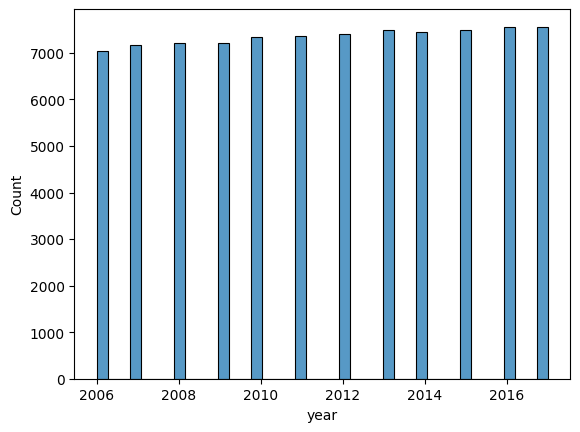

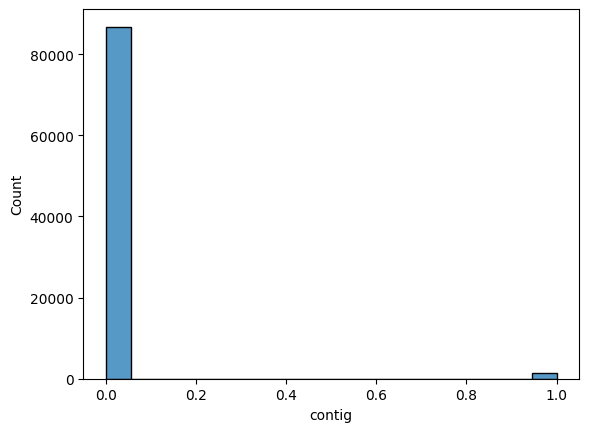

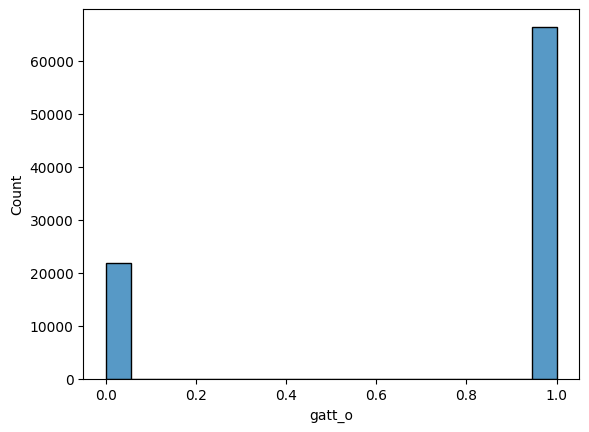

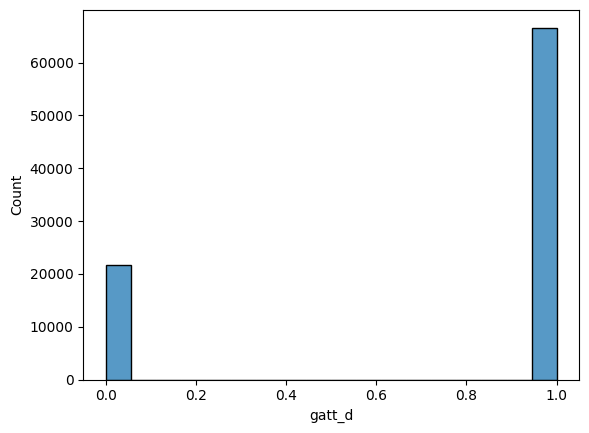

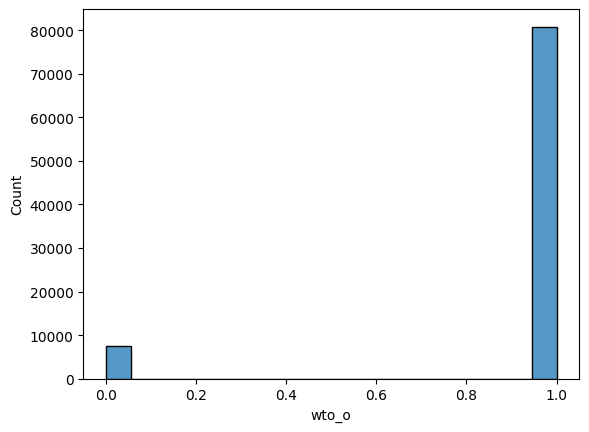

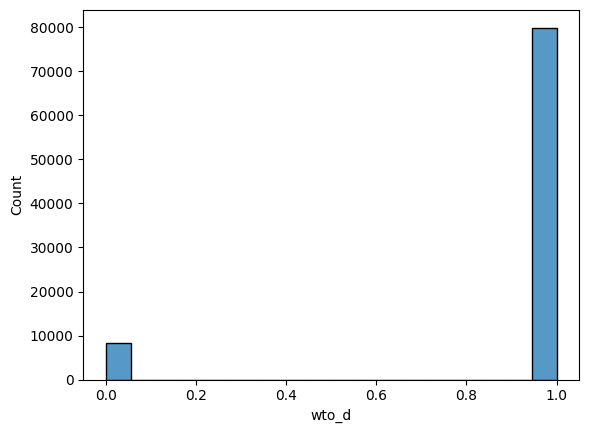

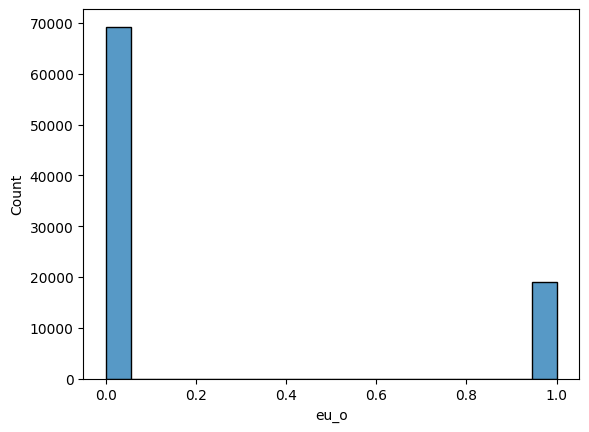

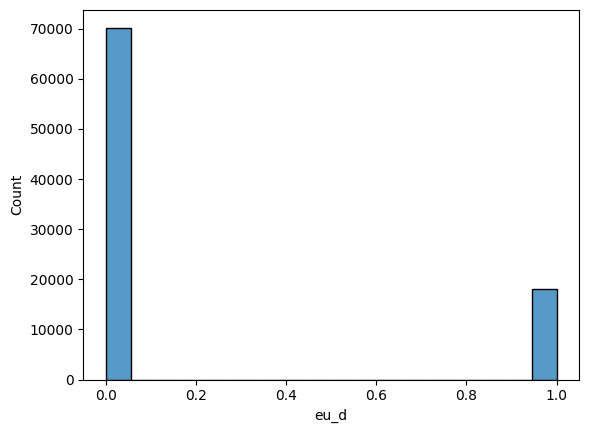

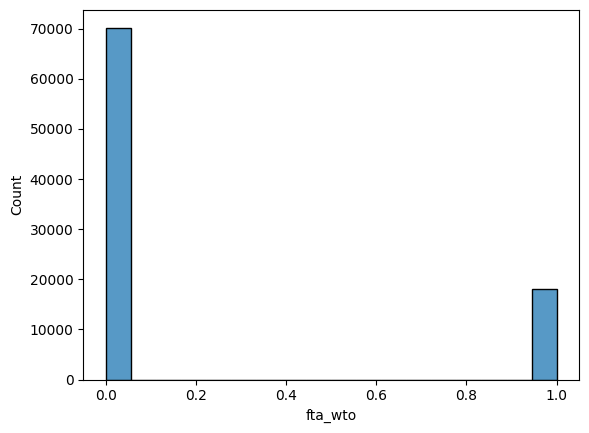

KeyboardInterrupt: 

In [ ]:
#histograms to understand the relations
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

In [ ]:
print(df["value_millions_$"].dtype)

float64


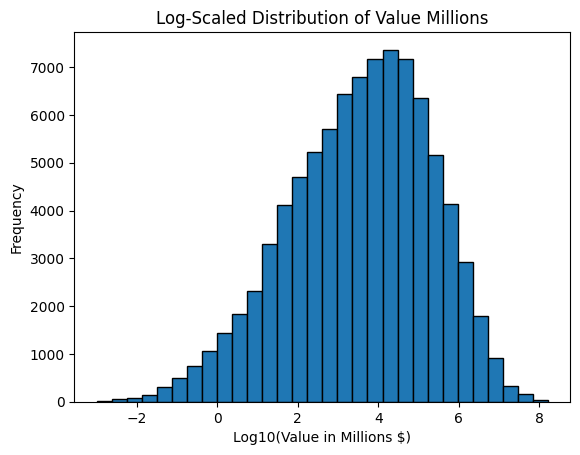

In [ ]:
data = df["value_millions_$"].replace(0, 0.001)

plt.hist(np.log10(data), bins=30, edgecolor='black')
plt.xlabel("Log10(Value in Millions $)")
plt.ylabel("Frequency")
plt.title("Log-Scaled Distribution of Value Millions")
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlation of all numeric columns with "value_millions_$"
correlation_with_target = correlation_matrix["value_millions_$"].sort_values(ascending=False)
print(correlation_with_target)


value_millions_$                                        1.000000
quantity_cubics_meter                                   0.424391
LSBCI                                                   0.378530
PCI_Structural Change_o                                 0.175991
PCI_Structural Change_d                                 0.170742
contig                                                  0.129410
PCI_Private sector_o                                    0.119599
PCI_Private sector_d                                    0.118415
PCI_Human capital_d                                     0.096273
PCI_Human capital_o                                     0.089922
PCI_o                                                   0.082242
PCI_d                                                   0.081563
fta_wto                                                 0.081012
PCI_Energy_o                                            0.070466
PCI_Energy_d                                            0.066045
PCI_Information and Commu

<ipython-input-23-48bc5c52024b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="coolwarm")


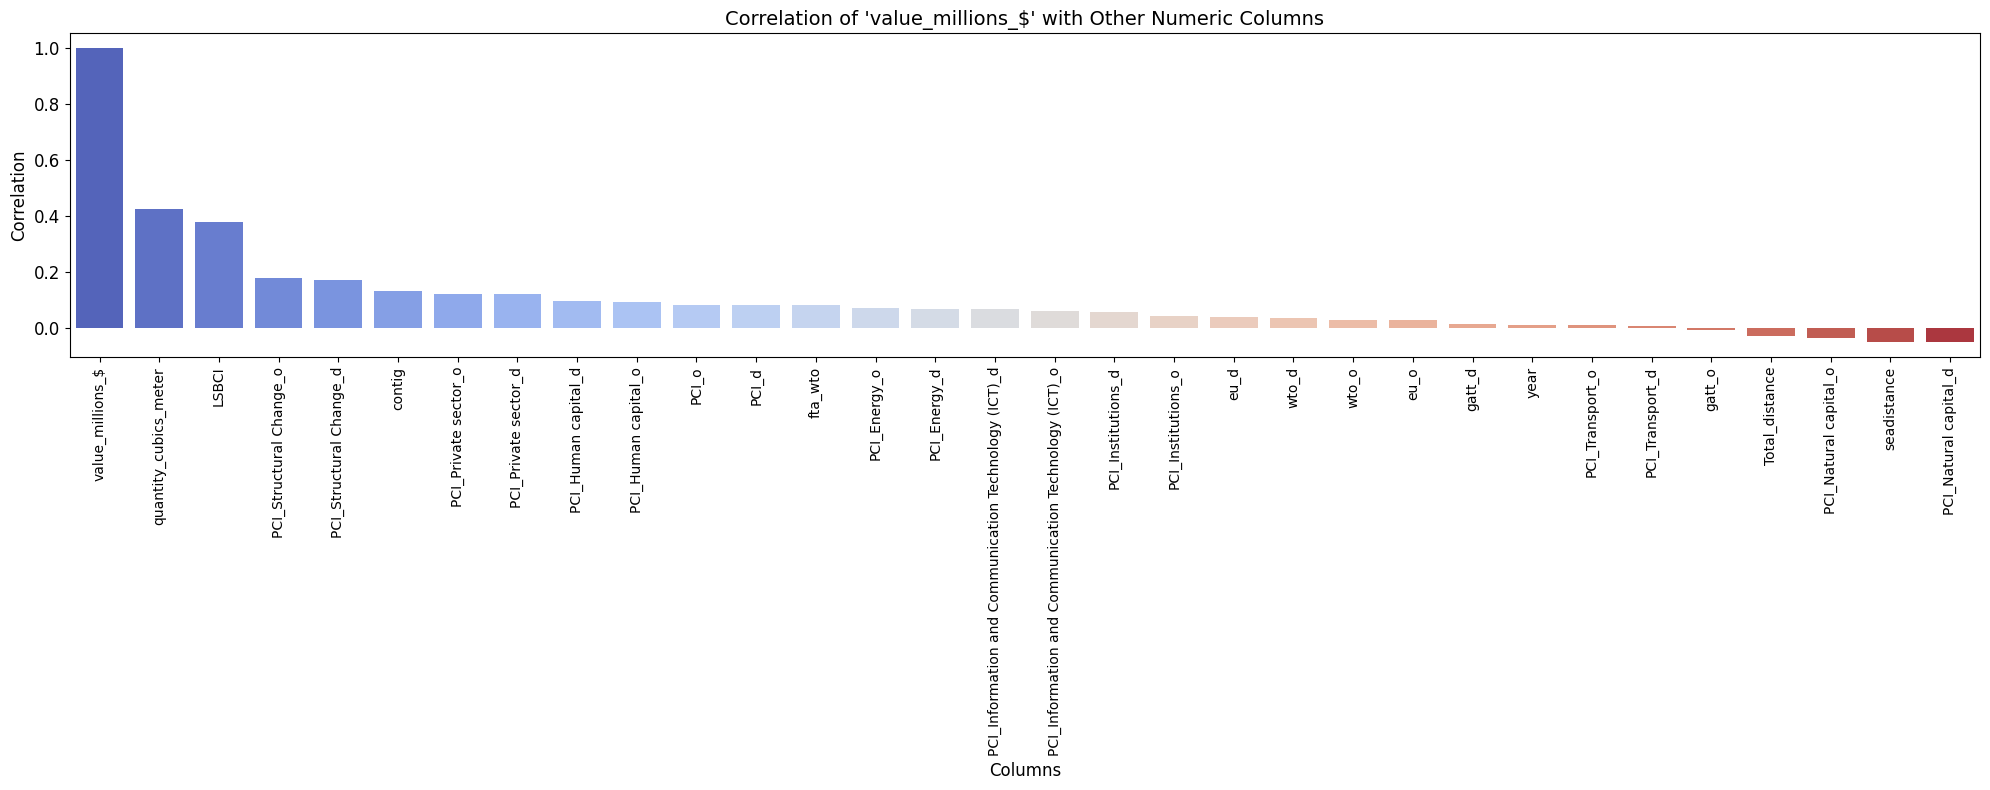

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Get correlation of all numeric columns with "value_millions_$"
correlation_with_target = correlation_matrix["value_millions_$"].sort_values(ascending=False)

# Plot correlation as a bar chart
plt.figure(figsize=(20, 8))  # Set figure size
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette="coolwarm")

# Formatting
plt.xticks(rotation=90, fontsize=10)  # Rotate labels & adjust font size
plt.yticks(fontsize=12)
plt.title("Correlation of 'value_millions_$' with Other Numeric Columns", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Correlation", fontsize=12)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


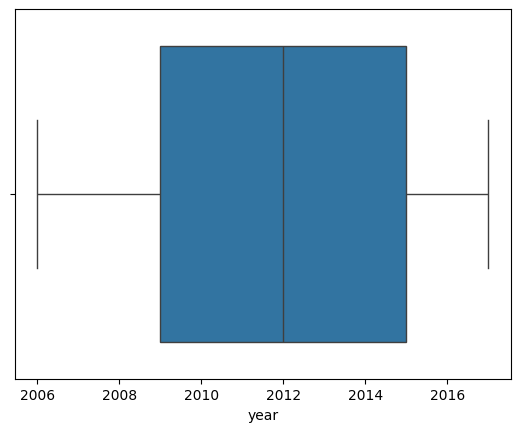

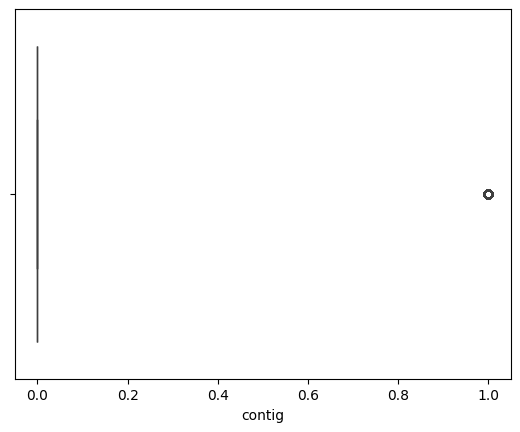

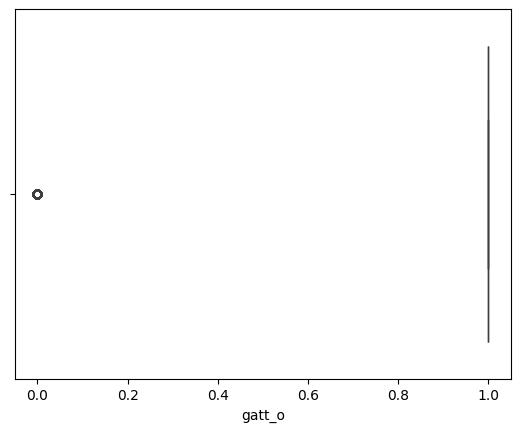

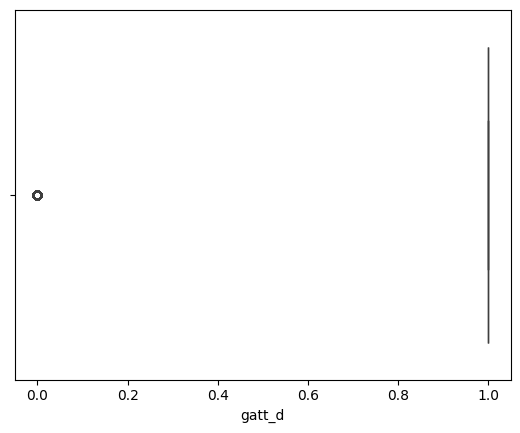

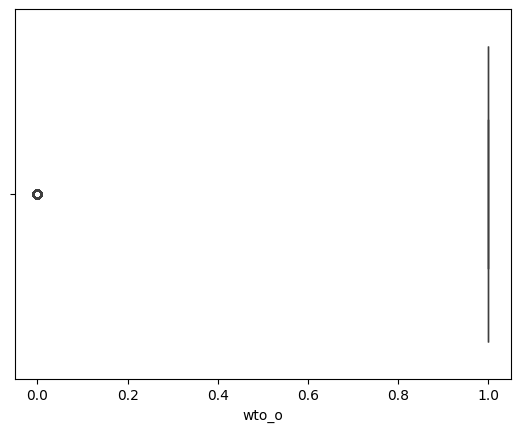

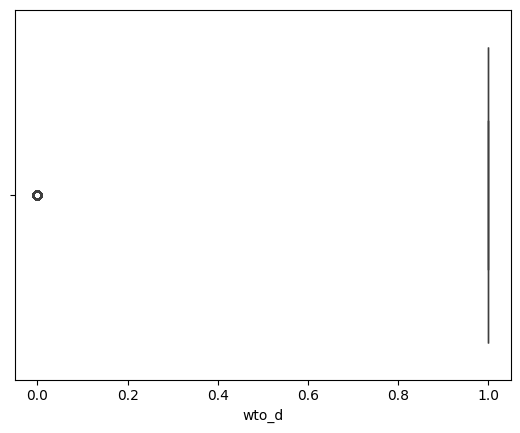

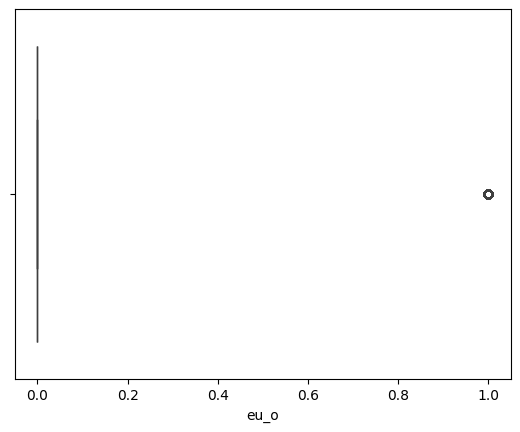

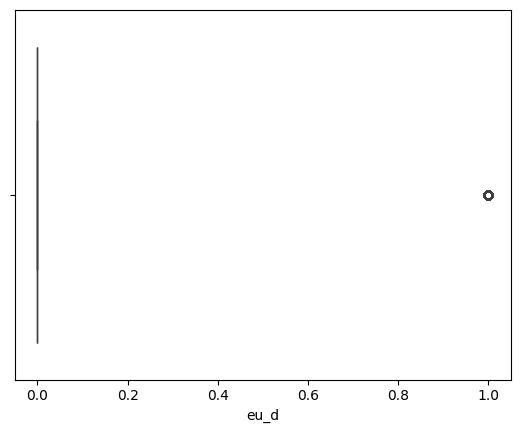

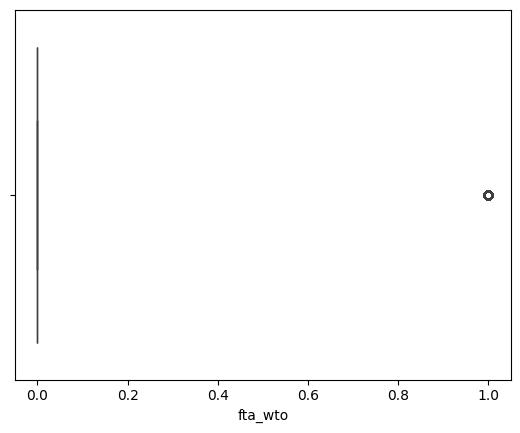

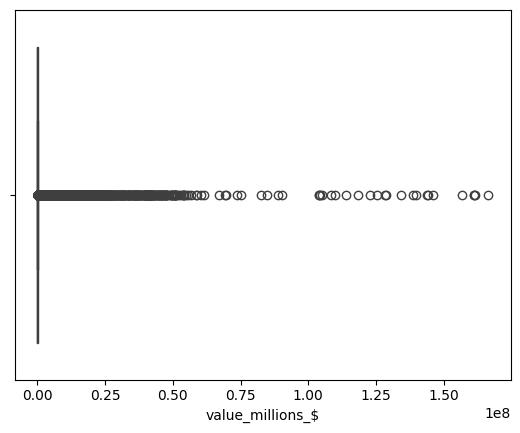

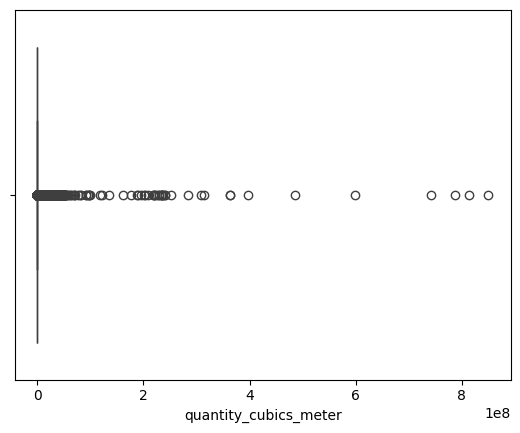

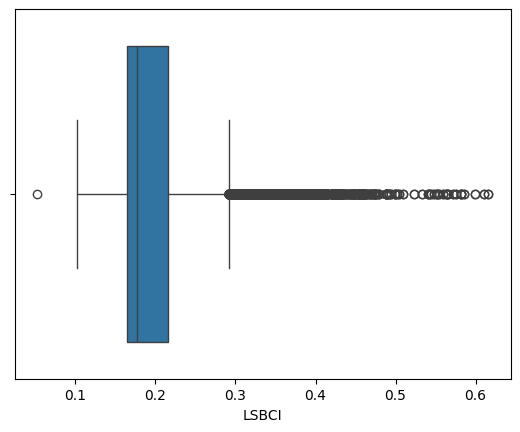

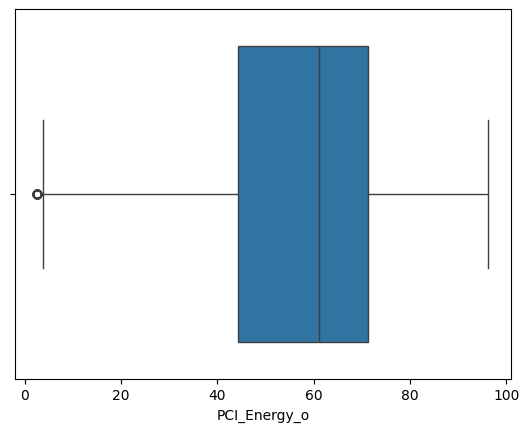

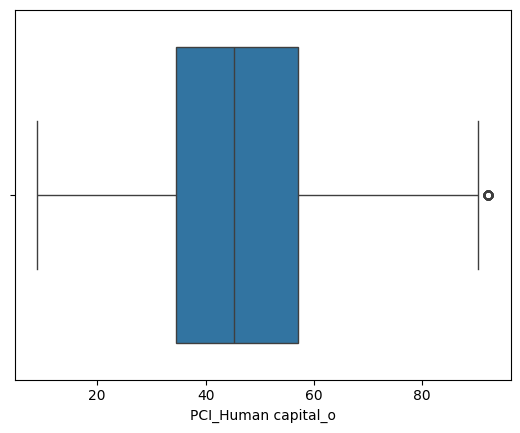

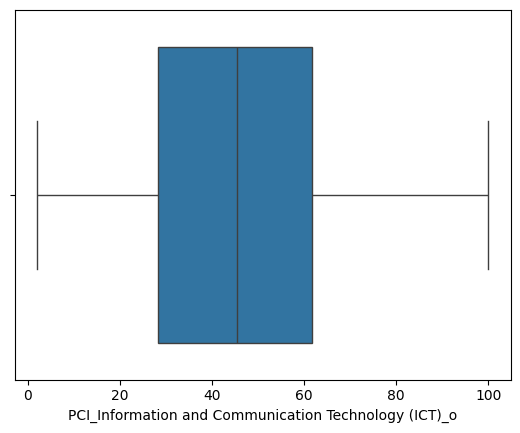

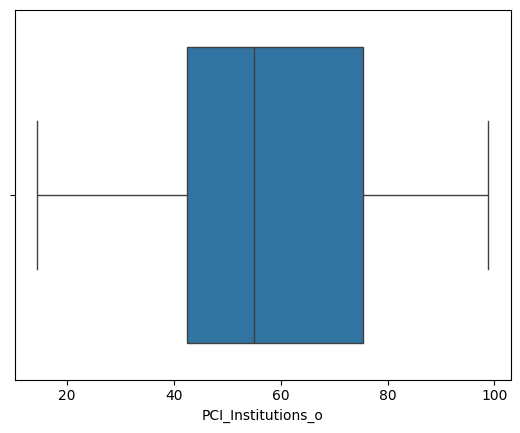

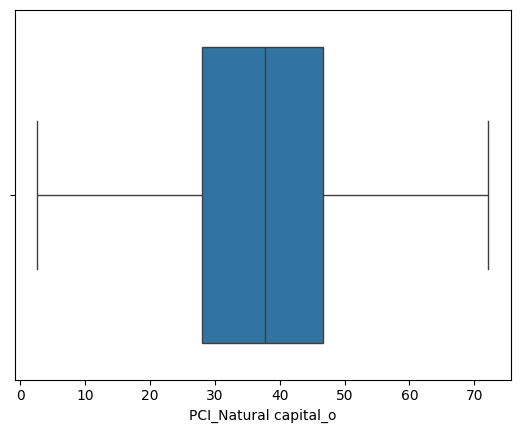

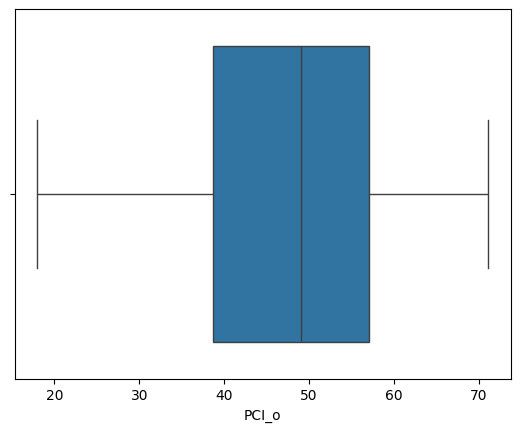

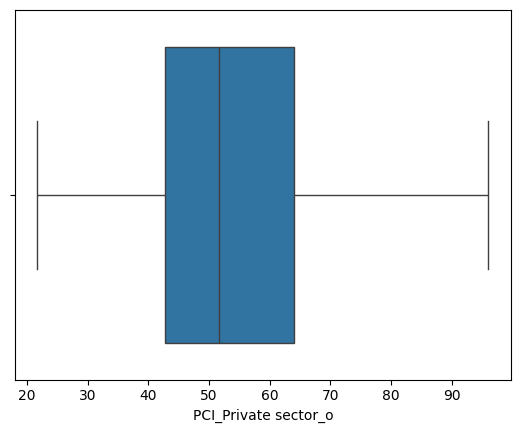

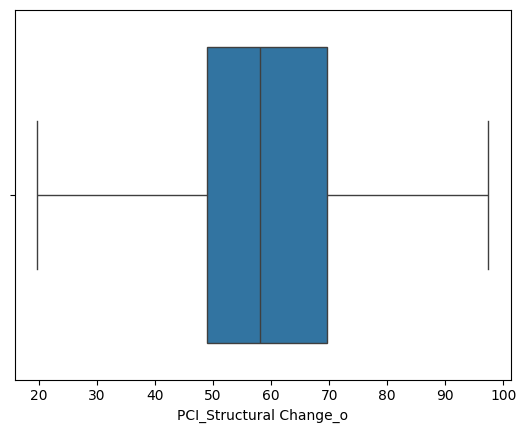

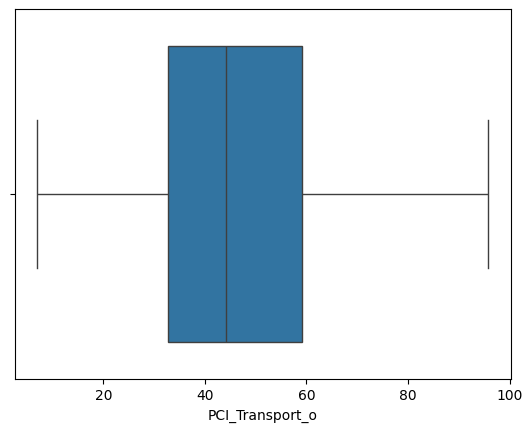

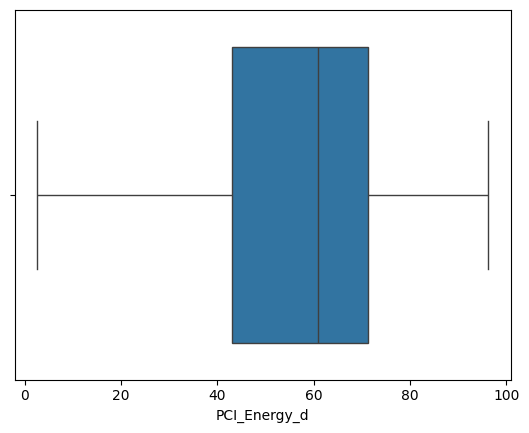

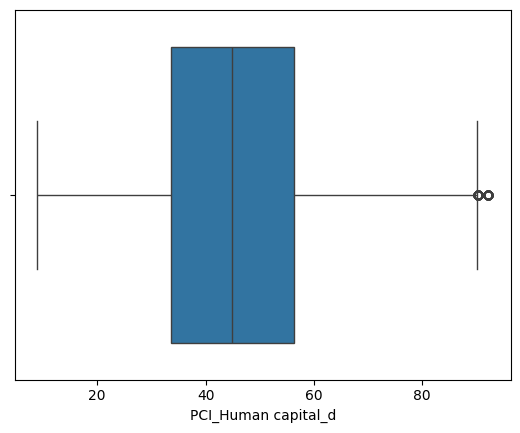

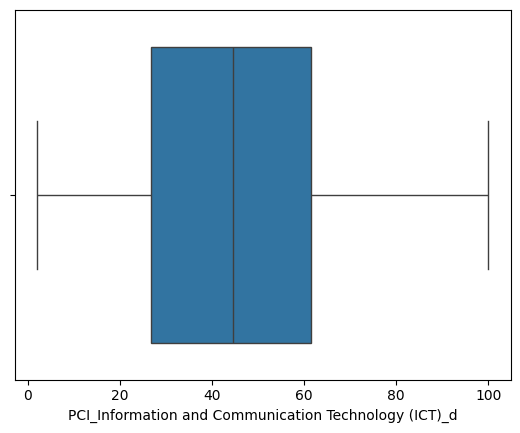

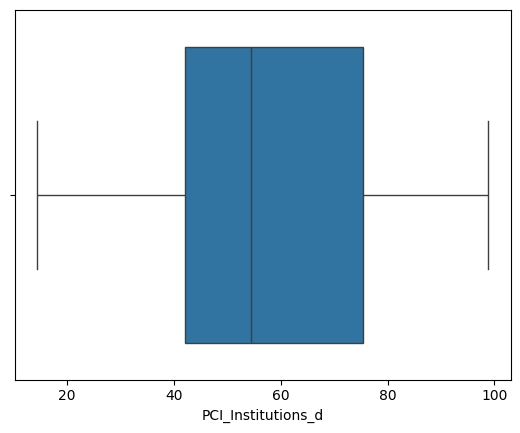

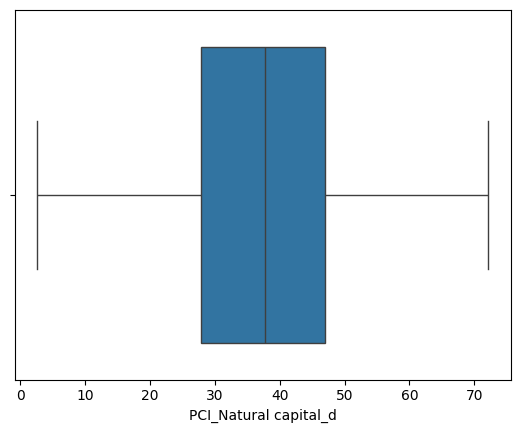

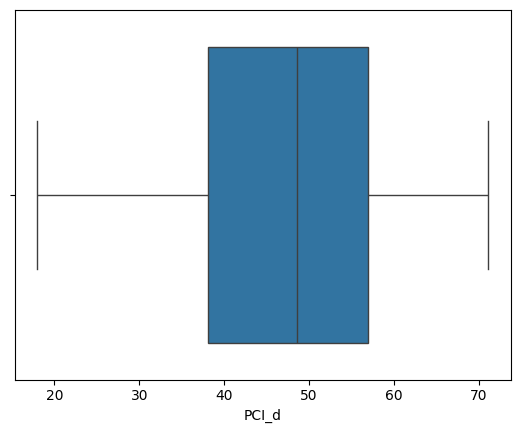

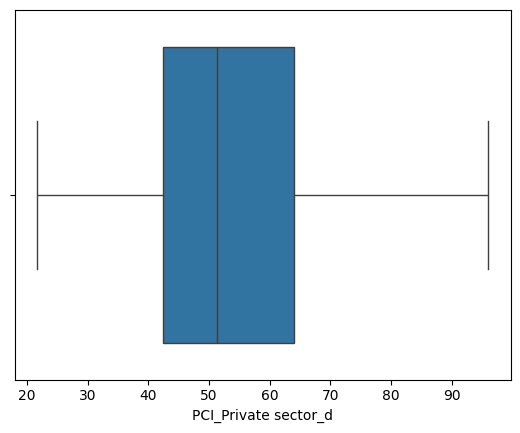

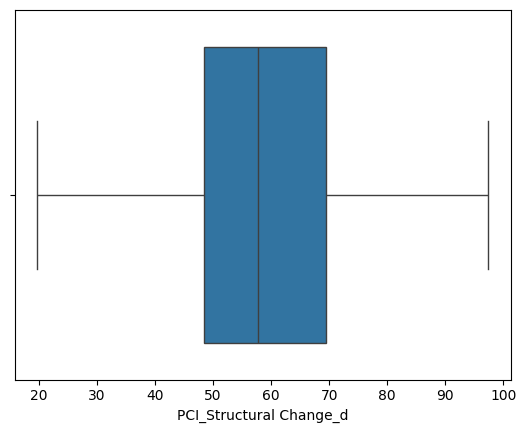

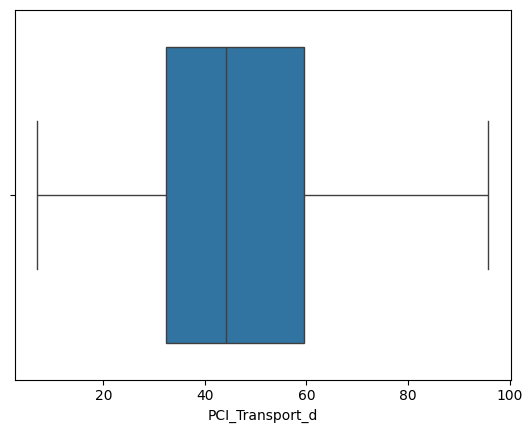

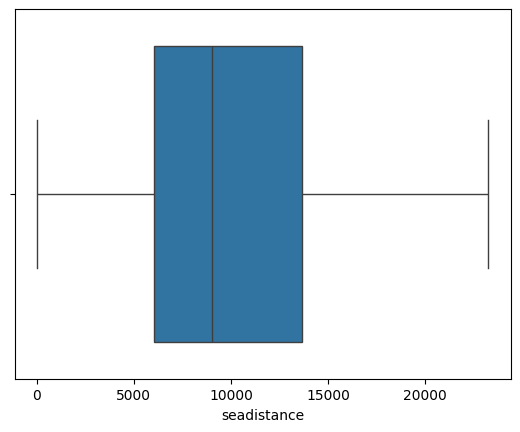

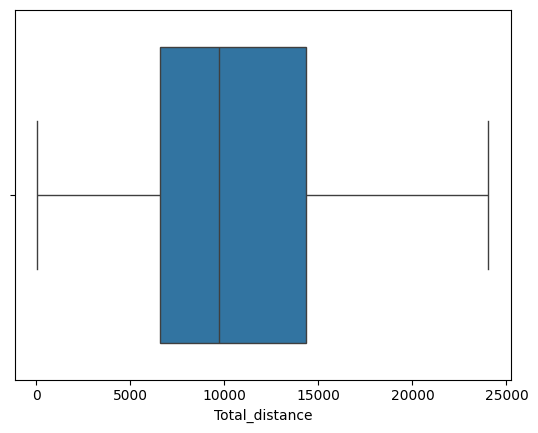

In [ ]:
#Box-plot to identify the outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

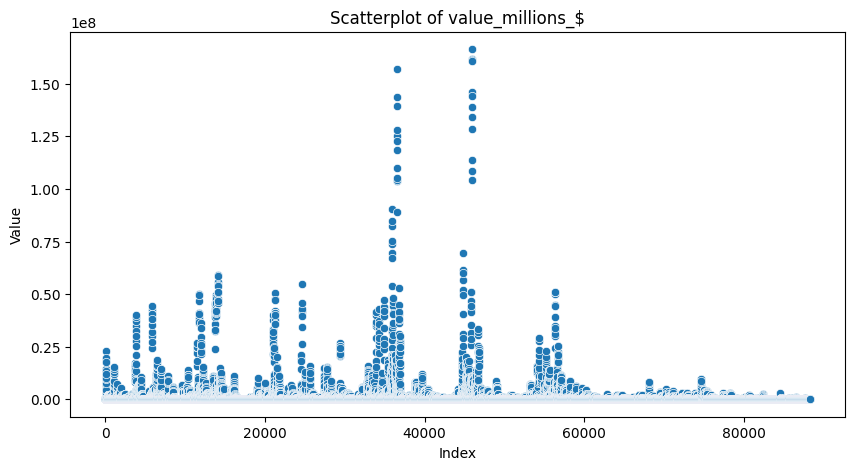

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df["value_millions_$"])
plt.title("Scatterplot of value_millions_$")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()

In [ ]:
from scipy import stats

df["z_score"] = stats.zscore(df["value_millions_$"])
outliers = df[abs(df["z_score"]) > 3]  # Data points with Z-score > 3 are outliers
outliers


origin destination  year  contig  gatt_o  gatt_d  wto_o  wto_d  eu_o  \
87       Brazil   Argentina  2006       1       1       1      1      1     0   
88       Brazil   Argentina  2007       1       1       1      1      1     0   
89       Brazil   Argentina  2008       1       1       1      1      1     0   
90       Brazil   Argentina  2009       1       1       1      1      1     0   
91       Brazil   Argentina  2010       1       1       1      1      1     0   
...         ...         ...   ...     ...     ...     ...    ...    ...   ...   
57108  Thailand   Singapore  2008       0       1       1      1      1     0   
57111  Thailand   Singapore  2011       0       1       1      1      1     0   
57112  Thailand   Singapore  2012       0       1       1      1      1     0   
57113  Thailand   Singapore  2013       0       1       1      1      1     0   
57114  Thailand   Singapore  2014       0       1       1      1      1     0   

       eu_d  ...  PCI_Information and Communication Technology (ICT)_d  \
87        0  ...                                            38.6562      
88        0  ...                                            42.9525      
89        0  ...                                            45.2350      
90        0  ...                                            47.6383      
91        0  ...                                            50.4084      
...     ...  ...                                                ...      
57108     0  ...                                            63.4244      
57111     0  ...                                            66.8732      
57112     0  ...                                            68.1184      
57113     0  ...                                            70.3402      
57114     0  ...                                            69.5956      

       PCI_Institutions_d  PCI_Natural capital_d    PCI_d  \
87                50.8536                42.5742  48.5793   
88                51.0986                42.1164  49.4372   
89                48.8003                41.7162  49.5991   
90                46.8249                39.9220  49.1350   
91                49.4339                40.2824  50.5363   
...                   ...                    ...      ...   
57108             90.8846                 2.6688  50.9682   
57111             89.5292                 6.9091  58.1306   
57112             91.6989                 5.8404  57.4701   
57113             91.1037                 4.9013  56.4257   
57114             91.8608                 4.6273  56.2813   

       PCI_Private sector_d  PCI_Structural Change_d  PCI_Transport_d  \
87                  48.1872                  62.4242          39.8752   
88                  48.2085                  62.7343          40.3415   
89                  49.2376                  62.5444          39.7965   
90                  49.2883                  59.3988          39.4195   
91                  49.9783                  59.6081          42.0440   
...                     ...                      ...              ...   
57108               90.7638                  74.0999          68.5761   
57111               90.0162                  72.6077          70.6686   
57112               90.3053                  74.0648          70.8870   
57113               90.1328                  74.1957          70.8425   
57114               90.4519                  74.9320          70.7733   

       seadistance  Total_distance   z_score  
87         2689.96       5549.2500  3.460994  
88         2689.96       5549.2500  4.316871  
89         2689.96       5549.2500  5.295007  
90         2689.96       5549.2500  3.737268  
91         2689.96       5549.2500  5.481521  
...            ...             ...       ...  
57108      1654.91       1673.8095  3.141358  
57111      1654.91       1673.8095  3.313294  
57112      1654.91       1673.8095  3.227025  
57113      1654.91       1673.8095  3.265310  
57114      1654.91  

In [ ]:
import numpy as np

def find_outliers_iqr(df):
    outlier_dict = {}  # Dictionary to store outlier counts per column

    for column in df.select_dtypes(include=np.number).columns:  # Select only numeric columns
        Q1 = df[column].quantile(0.25)  # 25th percentile
        Q3 = df[column].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile Range

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers in the original dataset
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Store in dictionary
        outlier_dict[column] = outlier_count

    return outlier_dict

# Detect outliers in all numeric columns
outliers = find_outliers_iqr(df)

# Print outlier count per column
print("Outlier Counts per Column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

NameError: name 'df' is not defined

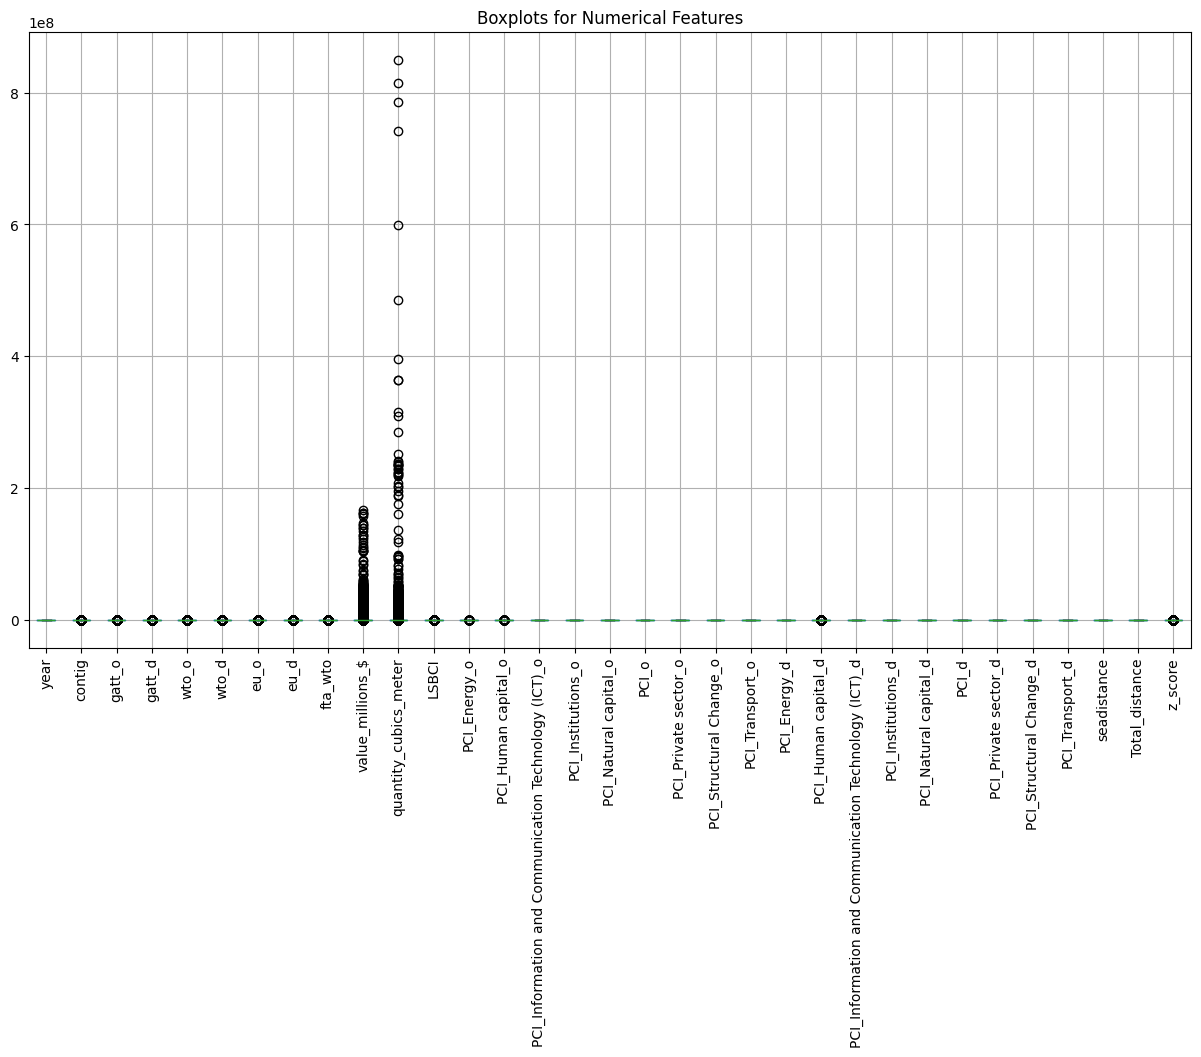

In [ ]:


numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots for all numeric columns
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(rot=90)  # Rotate labels for better readability
plt.title("Boxplots for Numerical Features")
plt.show()



In [ ]:
df.shape

(88272, 35)

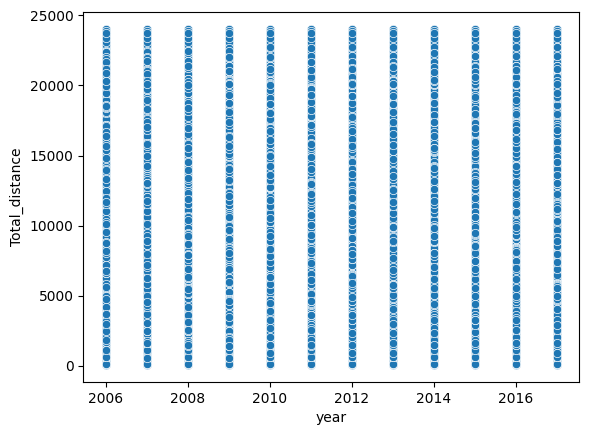

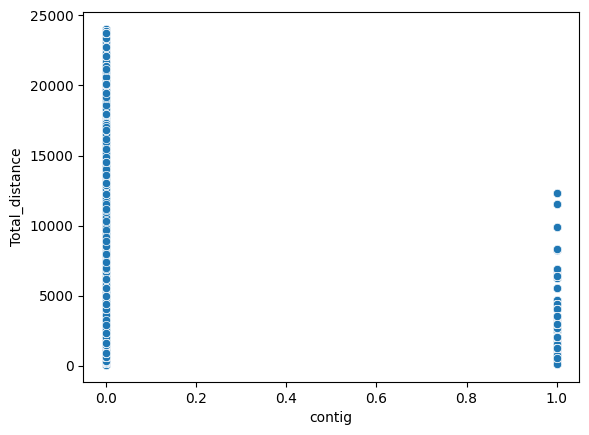

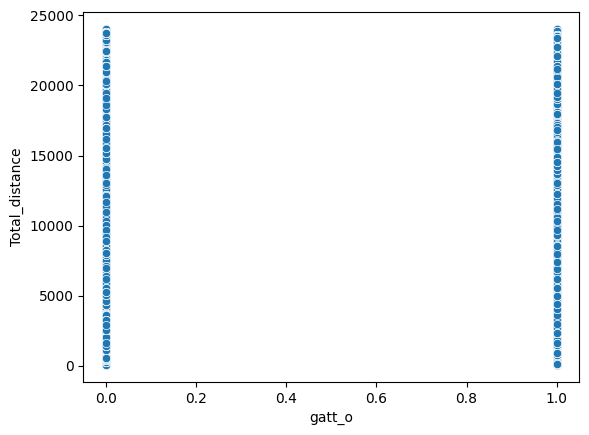

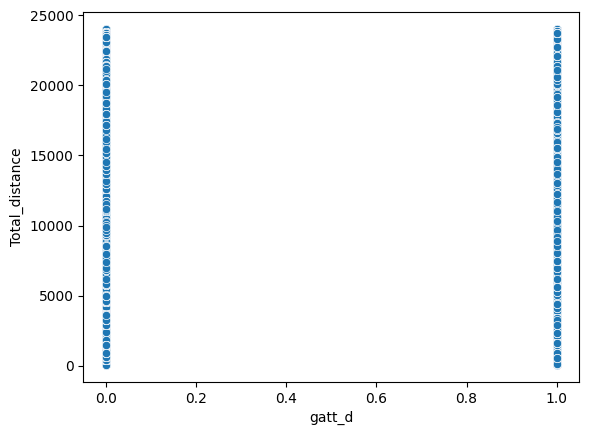

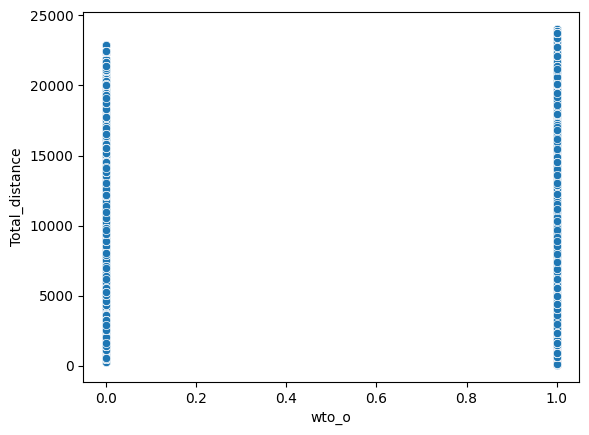

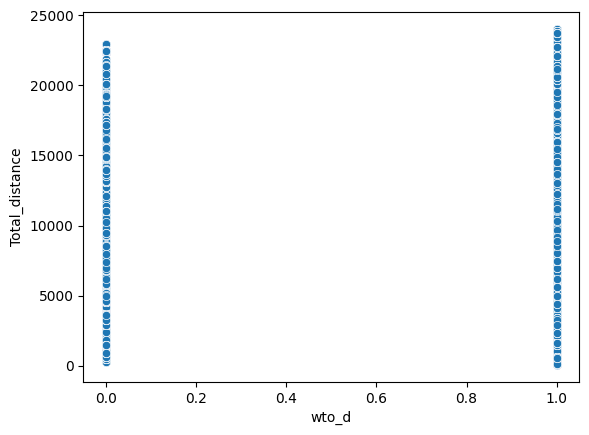

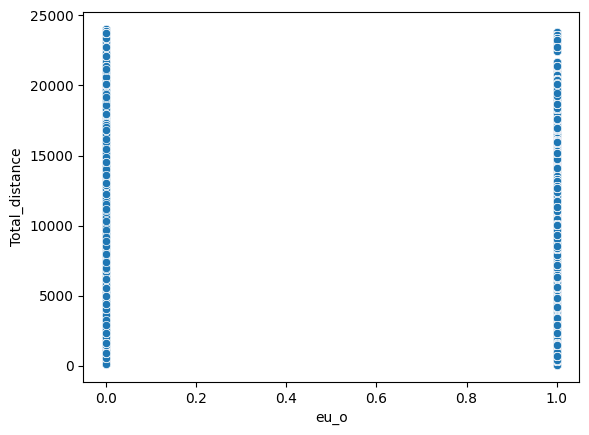

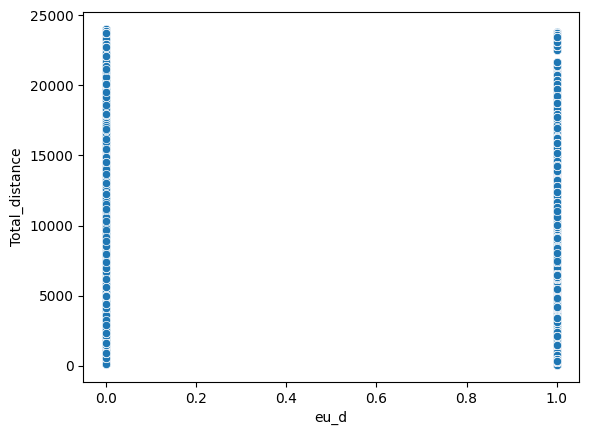

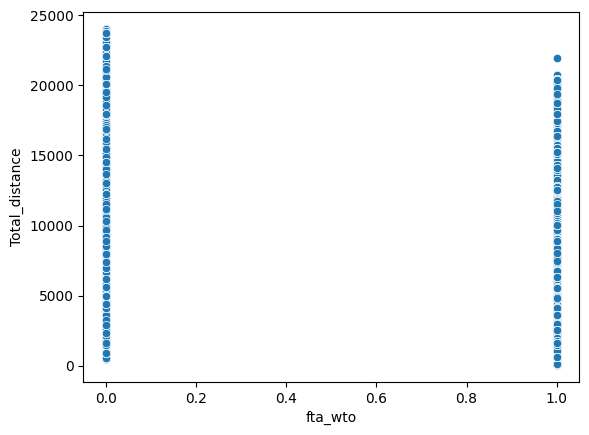

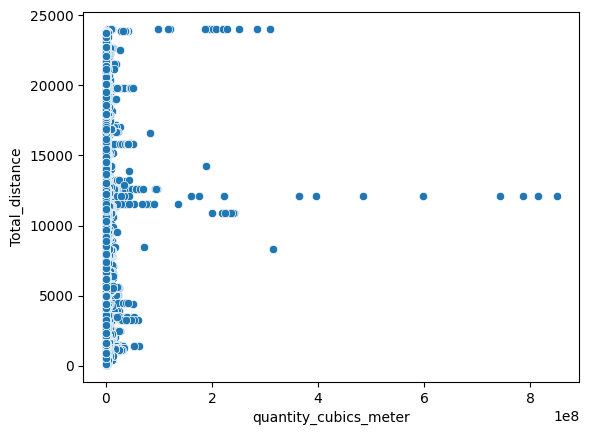

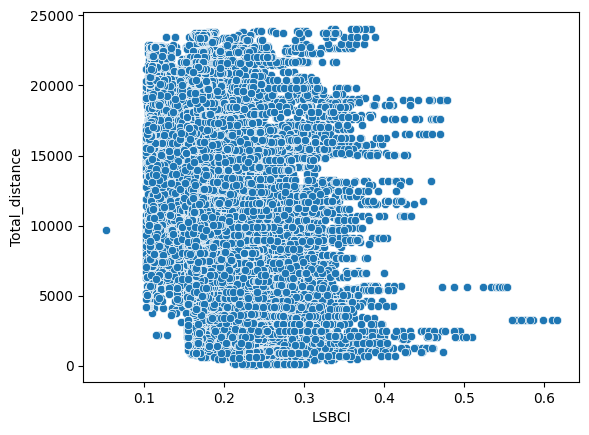

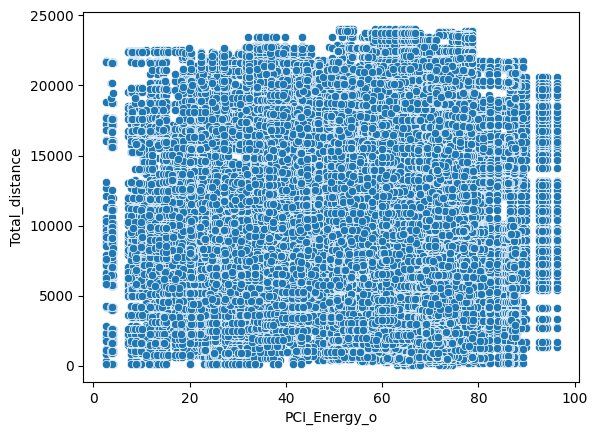

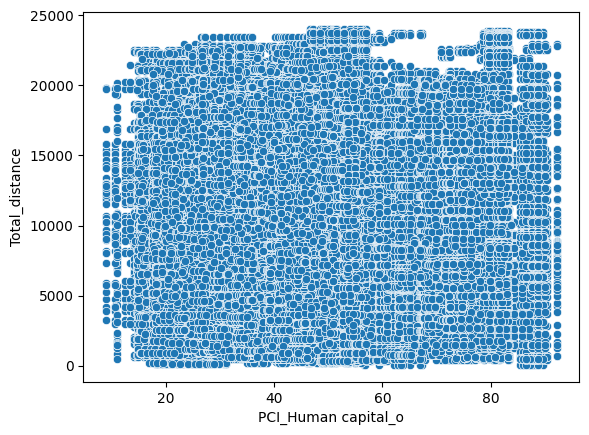

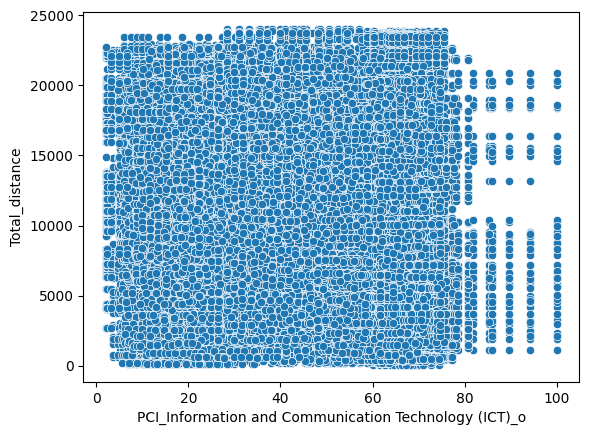

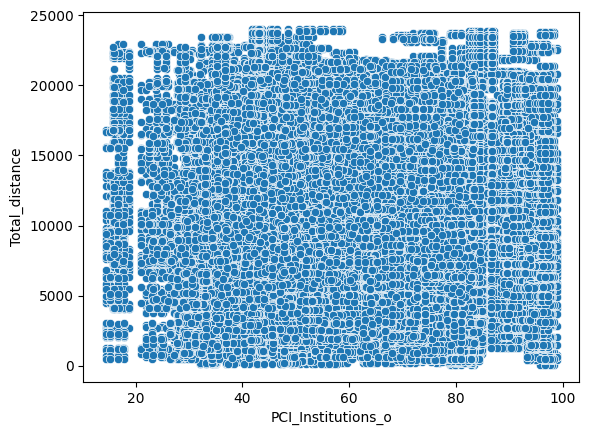

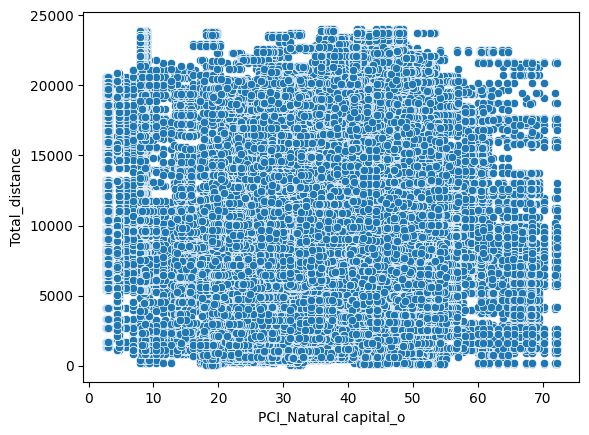

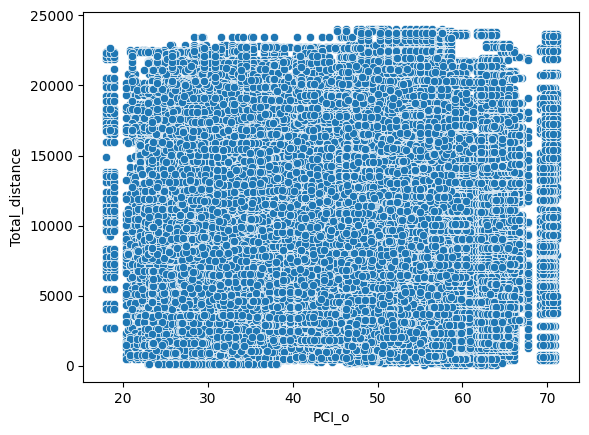

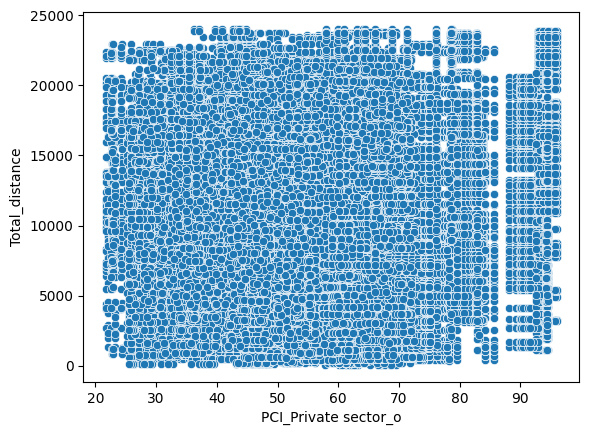

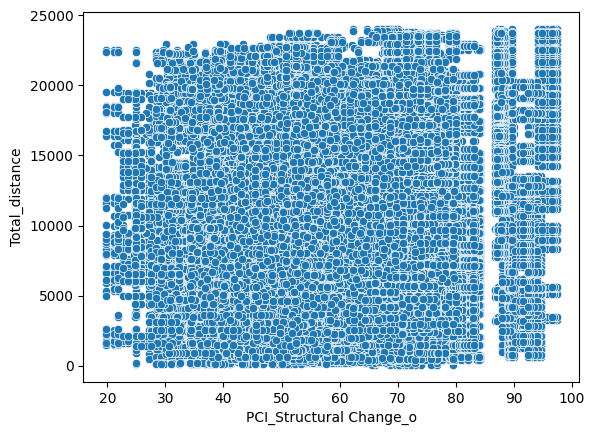

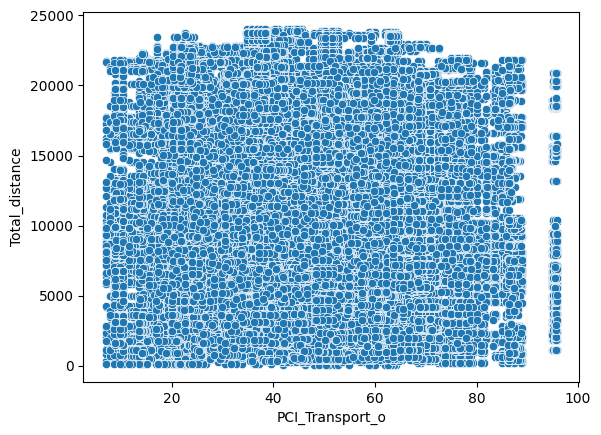

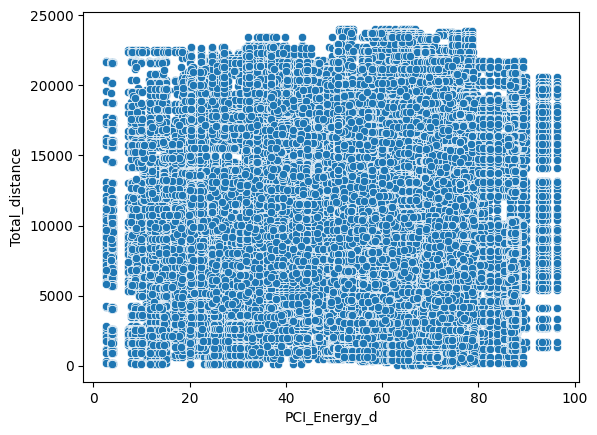

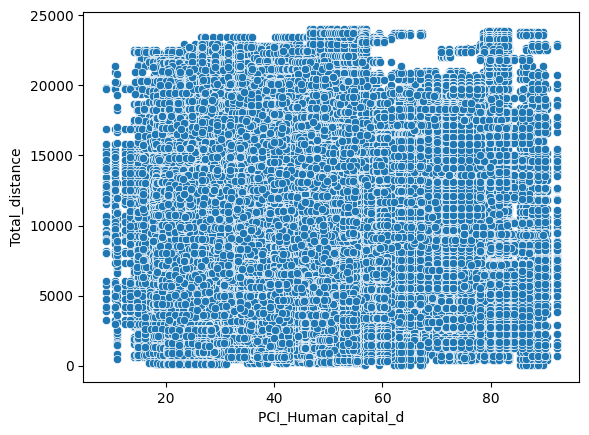

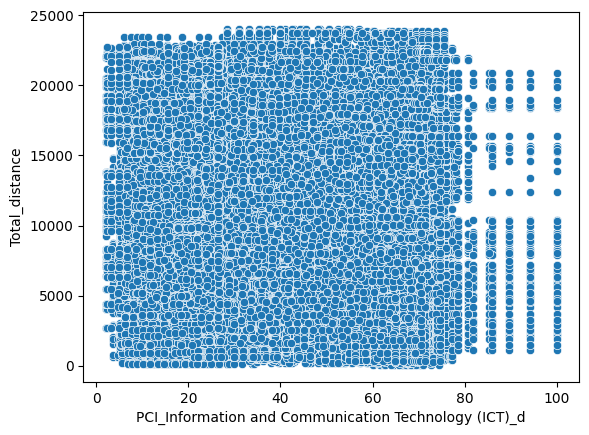

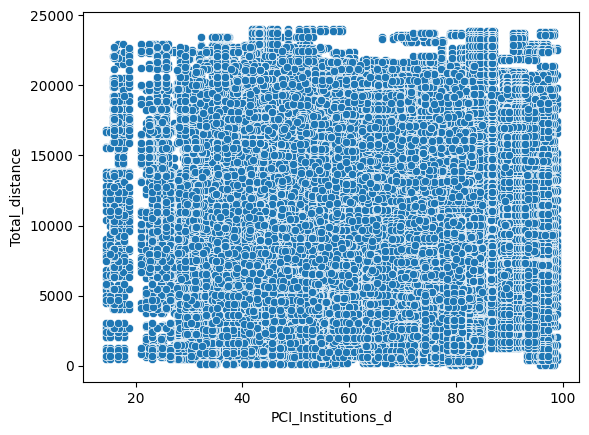

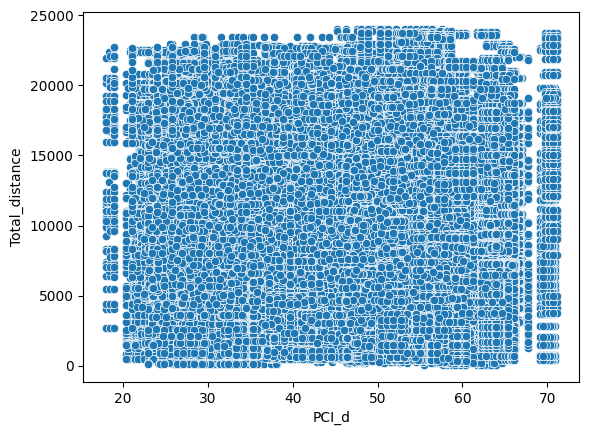

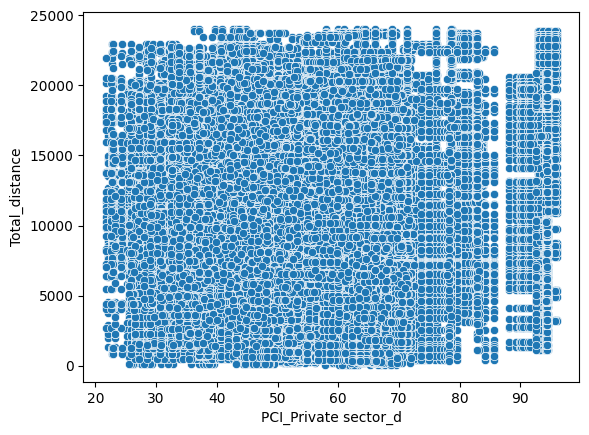

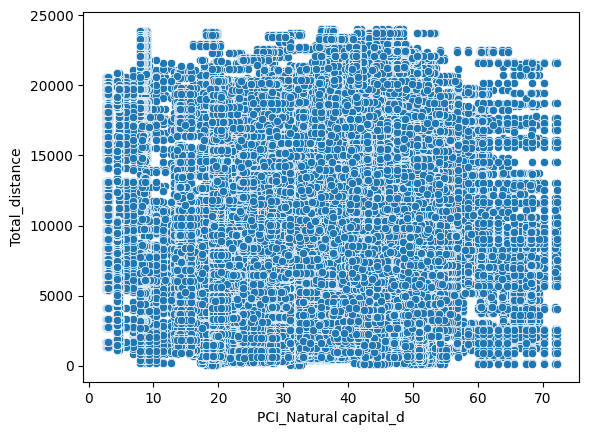

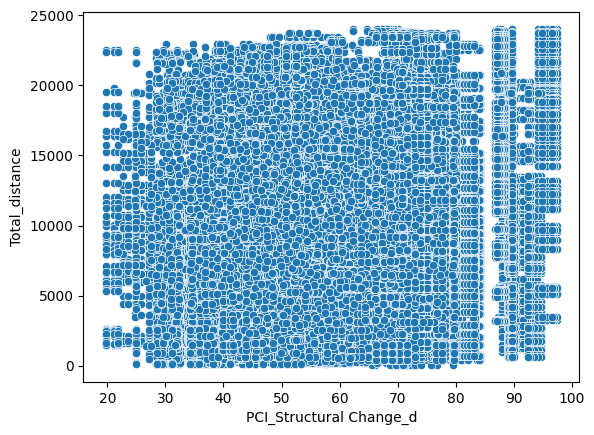

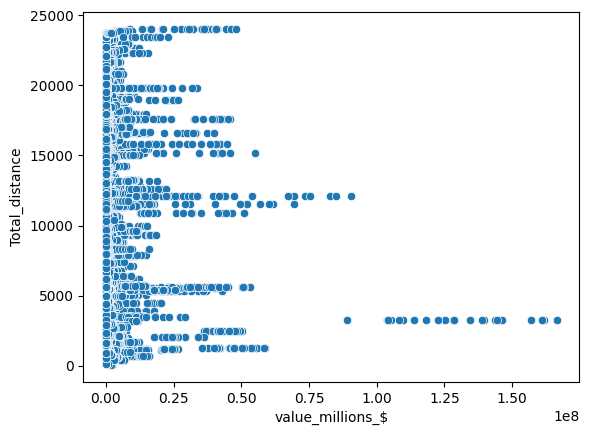

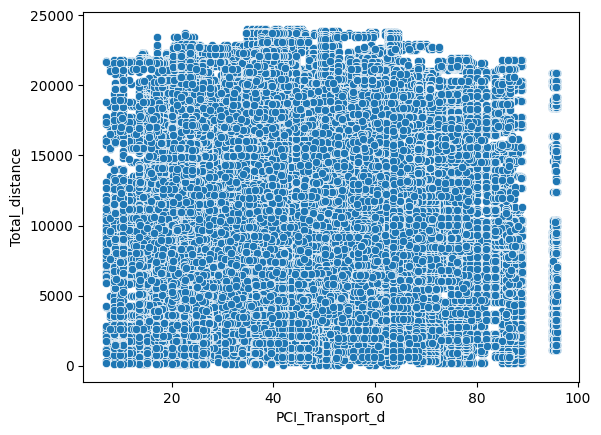

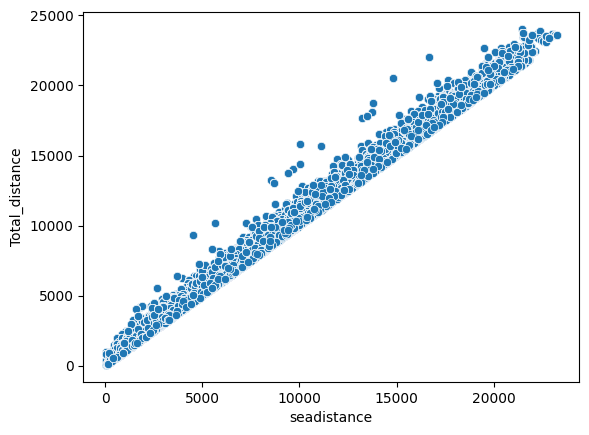

In [ ]:
for i in ['year', 'contig', 'gatt_o', 'gatt_d', 'wto_o', 'wto_d', 'eu_o', 'eu_d',
       'fta_wto', 'quantity_cubics_meter', 'LSBCI',
       'PCI_Energy_o', 'PCI_Human capital_o',
       'PCI_Information and Communication Technology (ICT)_o',
       'PCI_Institutions_o', 'PCI_Natural capital_o', 'PCI_o',
       'PCI_Private sector_o', 'PCI_Structural Change_o', 'PCI_Transport_o',
       'PCI_Energy_d', 'PCI_Human capital_d',
       'PCI_Information and Communication Technology (ICT)_d',
       'PCI_Institutions_d', 'PCI_d',
       'PCI_Private sector_d','PCI_Natural capital_d', 'PCI_Structural Change_d','value_millions_$', 'PCI_Transport_d',
       'seadistance']:
       sns.scatterplot(data=df,x=i,y="Total_distance")
       plt.show()

In [ ]:
s=df.select_dtypes(include="number").corr()

<Axes: >

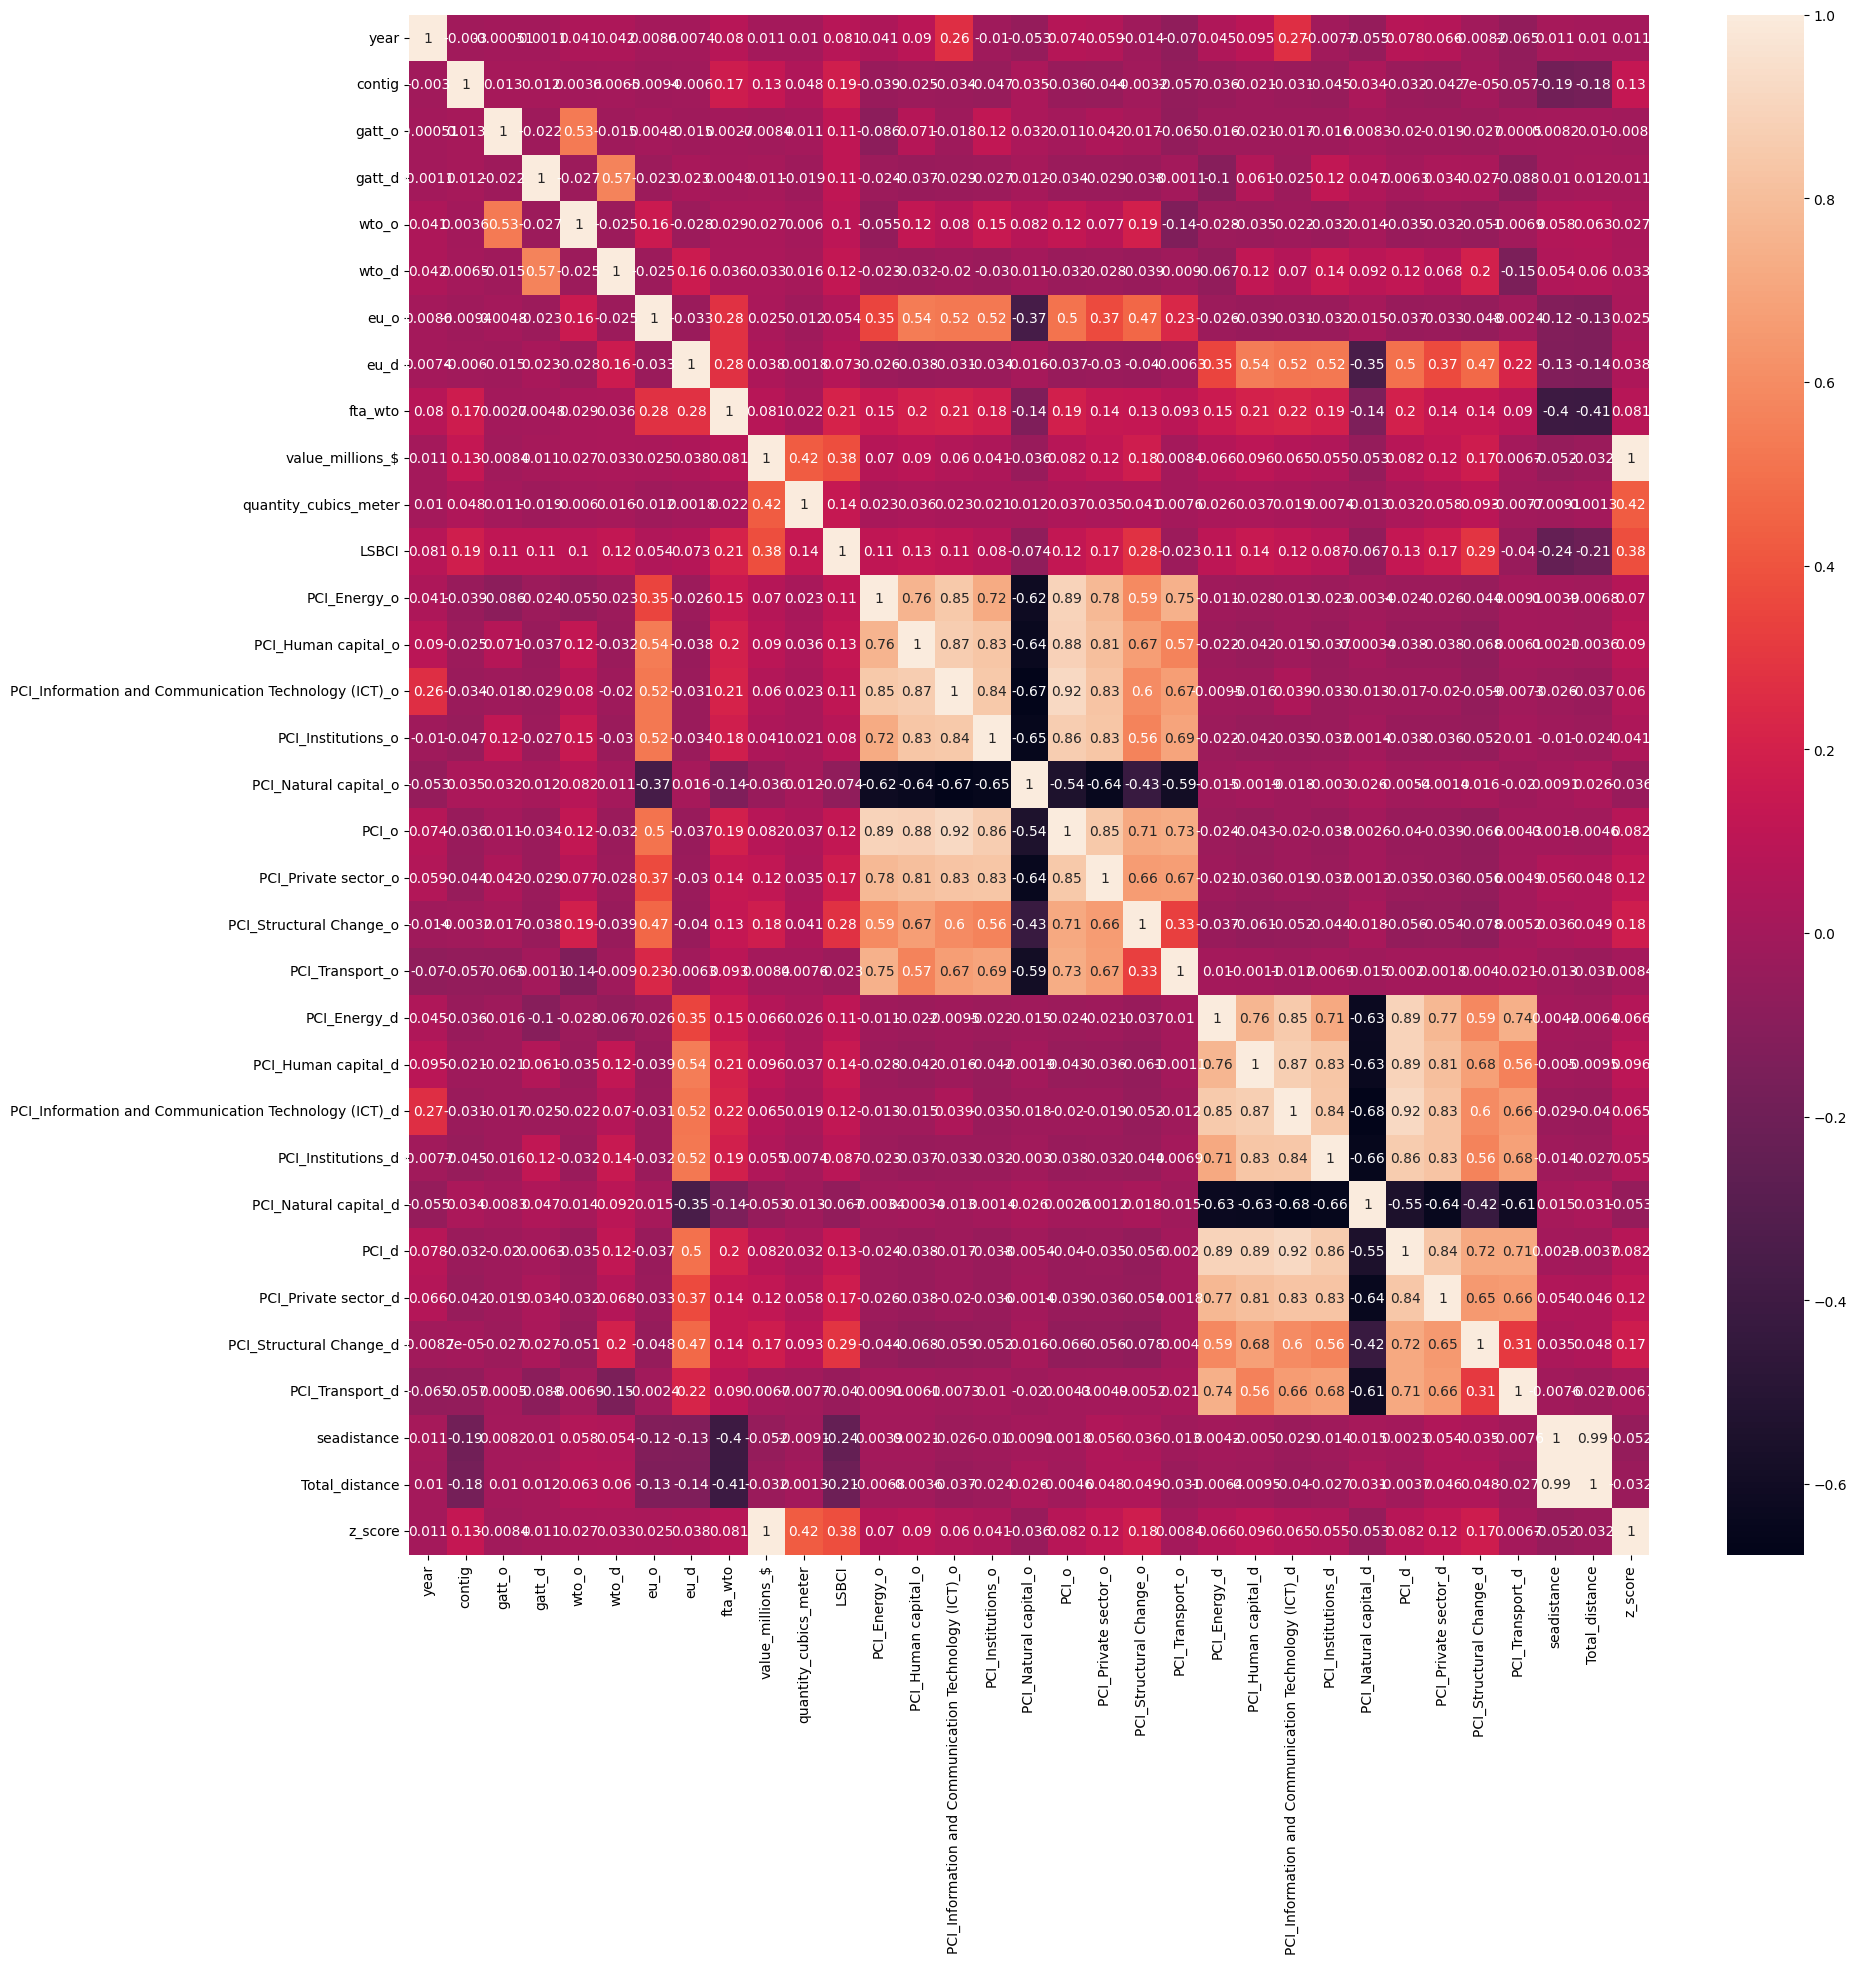

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(s,annot=True)

In [ ]:
#Outlier Handling
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-(1.5*iqr)
  uw=q3+(1.5*iqr)
  return lw,uw


In [ ]:
wisker(df['LSBCI'])

(np.float64(0.08787812499999999), np.float64(0.291803125))

In [ ]:
wisker(df['quantity_cubics_meter'])
wisker(df['value_millions_$'])

(np.float64(-103154.71700000003), np.float64(172514.21100000004))

In [ ]:
for i in ['LSBCI','quantity_cubics_meter','value_millions_$']:
  lw,uw=wisker(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

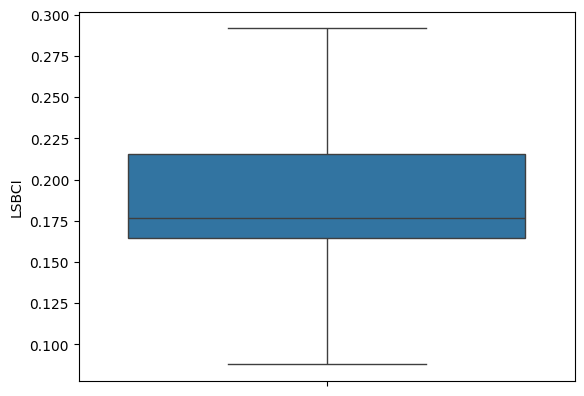

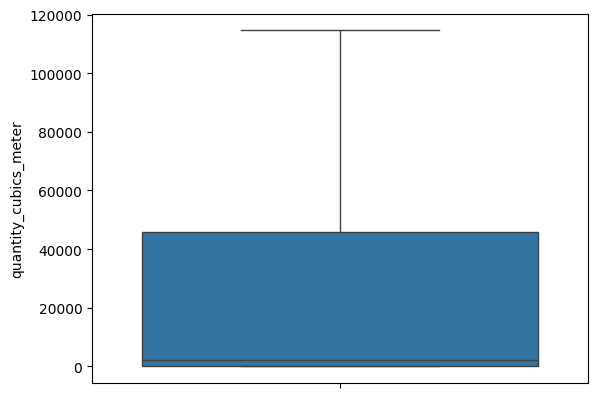

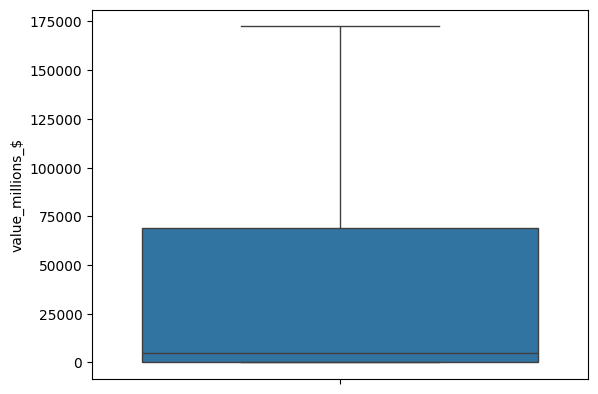

In [ ]:
for i in ['LSBCI','quantity_cubics_meter','value_millions_$']:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.drop_duplicates()

origin destination  year  contig  gatt_o  gatt_d  wto_o  wto_d  eu_o  \
0         Aruba   Argentina  2006       0       0       1      0      1     0   
1         Aruba   Argentina  2007       0       0       1      0      1     0   
2         Aruba   Argentina  2008       0       0       1      0      1     0   
3         Aruba   Argentina  2009       0       0       1      0      1     0   
4         Aruba   Argentina  2010       0       0       1      0      1     0   
...         ...         ...   ...     ...     ...     ...    ...    ...   ...   
88267  Barbados    Cambodia  2017       0       1       0      1      1     0   
88268    Belize    Maldives  2017       0       1       1      1      1     0   
88269   Georgia    Maldives  2017       0       0       1      1      1     0   
88270  Suriname     Vanuatu  2017       0       1       0      1      1     0   
88271     Malta       Samoa  2017       0       1       0      1      1     1   

       eu_d  ...  PCI_Information and Communication Technology (ICT)_d  \
0         0  ...                                            38.6562      
1         0  ...                                            42.9525      
2         0  ...                                            45.2350      
3         0  ...                                            47.6383      
4         0  ...                                            50.4084      
...     ...  ...                                                ...      
88267     0  ...                                            33.5624      
88268     0  ...                                            55.2109      
88269     0  ...                                            55.2109      
88270     0  ...                                            33.5307      
88271     0  ...                                            33.9852      

       PCI_Institutions_d  PCI_Natural capital_d    PCI_d  \
0                 50.8536                42.5742  48.5793   
1                 51.0986                42.1164  49.4372   
2                 48.8003                41.7162  49.5991   
3                 46.8249                39.9220  49.1350   
4                 49.4339                40.2824  50.5363   
...                   ...                    ...      ...   
88267             37.9213                40.5968  36.7876   
88268             44.8558                20.4013  50.1137   
88269             44.8558                20.4013  50.1137   
88270             57.8437                38.3321  42.8615   
88271             71.5187                28.2461  46.3743   

       PCI_Private sector_d  PCI_Structural Change_d  PCI_Transport_d  \
0                   48.1872                  62.4242          39.8752   
1                   48.2085                  62.7343          40.3415   
2                   49.2376                  62.5444          39.7965   
3                   49.2883                  59.3988          39.4195   
4                   49.9783                  59.6081          42.0440   
...                     ...                      ...              ...   
88267               45.8231                  42.4634          24.7302   
88268               53.1412                  62.3368          65.5609   
88269               53.1412                  62.3368          65.5609   
88270               53.3060                  42.8351          56.3301   
88271               49.3883                  57.8448          55.6083   

       seadistance  Total_distance   z_score  
0          9917.57      11655.7900 -0.134970  
1          9917.57      11655.7900 -0.136353  
2          9917.57      11655.7900 -0.136945  
3          9917.57      11655.7900 -0.137279  
4          9917.57      11655.7900 -0.137646  
...            ...             ...       ...  
88267     21010.50      21149.7550 -0.137647  
88268     19065.30      19143.1406 -0.137647  
88269      8485.23       8920.9890 -0.137646  
88270     15476.50      15476.5195 -0.137646  
88271     19495.40  

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply Label Encoding to all columns
df_encoded = df.apply(lambda col: le.fit_transform(col.astype(str)))

# Display first few rows of encoded DataFrame
print(df_encoded.head())


   origin  destination  year  contig  gatt_o  gatt_d  wto_o  wto_d  eu_o  \
0       3            2     0       0       0       1      0      1     0   
1       3            2     1       0       0       1      0      1     0   
2       3            2     2       0       0       1      0      1     0   
3       3            2     3       0       0       1      0      1     0   
4       3            2     4       0       0       1      0      1     0   

   eu_d  ...  PCI_Information and Communication Technology (ICT)_d  \
0     0  ...                                                457      
1     0  ...                                                537      
2     0  ...                                                565      
3     0  ...                                                598      
4     0  ...                                                644      

   PCI_Institutions_d  PCI_Natural capital_d  PCI_d  PCI_Private sector_d  \
0                 506                    700 

In [ ]:
pd.set_option('display.max_columns', None)

# Display first few rows with all columns
print(df_encoded.head())

   origin  destination  year  contig  gatt_o  gatt_d  wto_o  wto_d  eu_o  \
0       3            2     0       0       0       1      0      1     0   
1       3            2     1       0       0       1      0      1     0   
2       3            2     2       0       0       1      0      1     0   
3       3            2     3       0       0       1      0      1     0   
4       3            2     4       0       0       1      0      1     0   

   eu_d  fta_wto  value_millions_$  quantity_cubics_meter  LSBCI  \
0     0        0             64965                  18211   2542   
1     0        0             43762                  50144   2049   
2     0        0             26838                  25164   2009   
3     0        0              7631                   7068   2295   
4     0        0             33658                     12   2346   

   PCI_Energy_o  PCI_Human capital_o  \
0          1066                  671   
1          1069                  670   
2          106

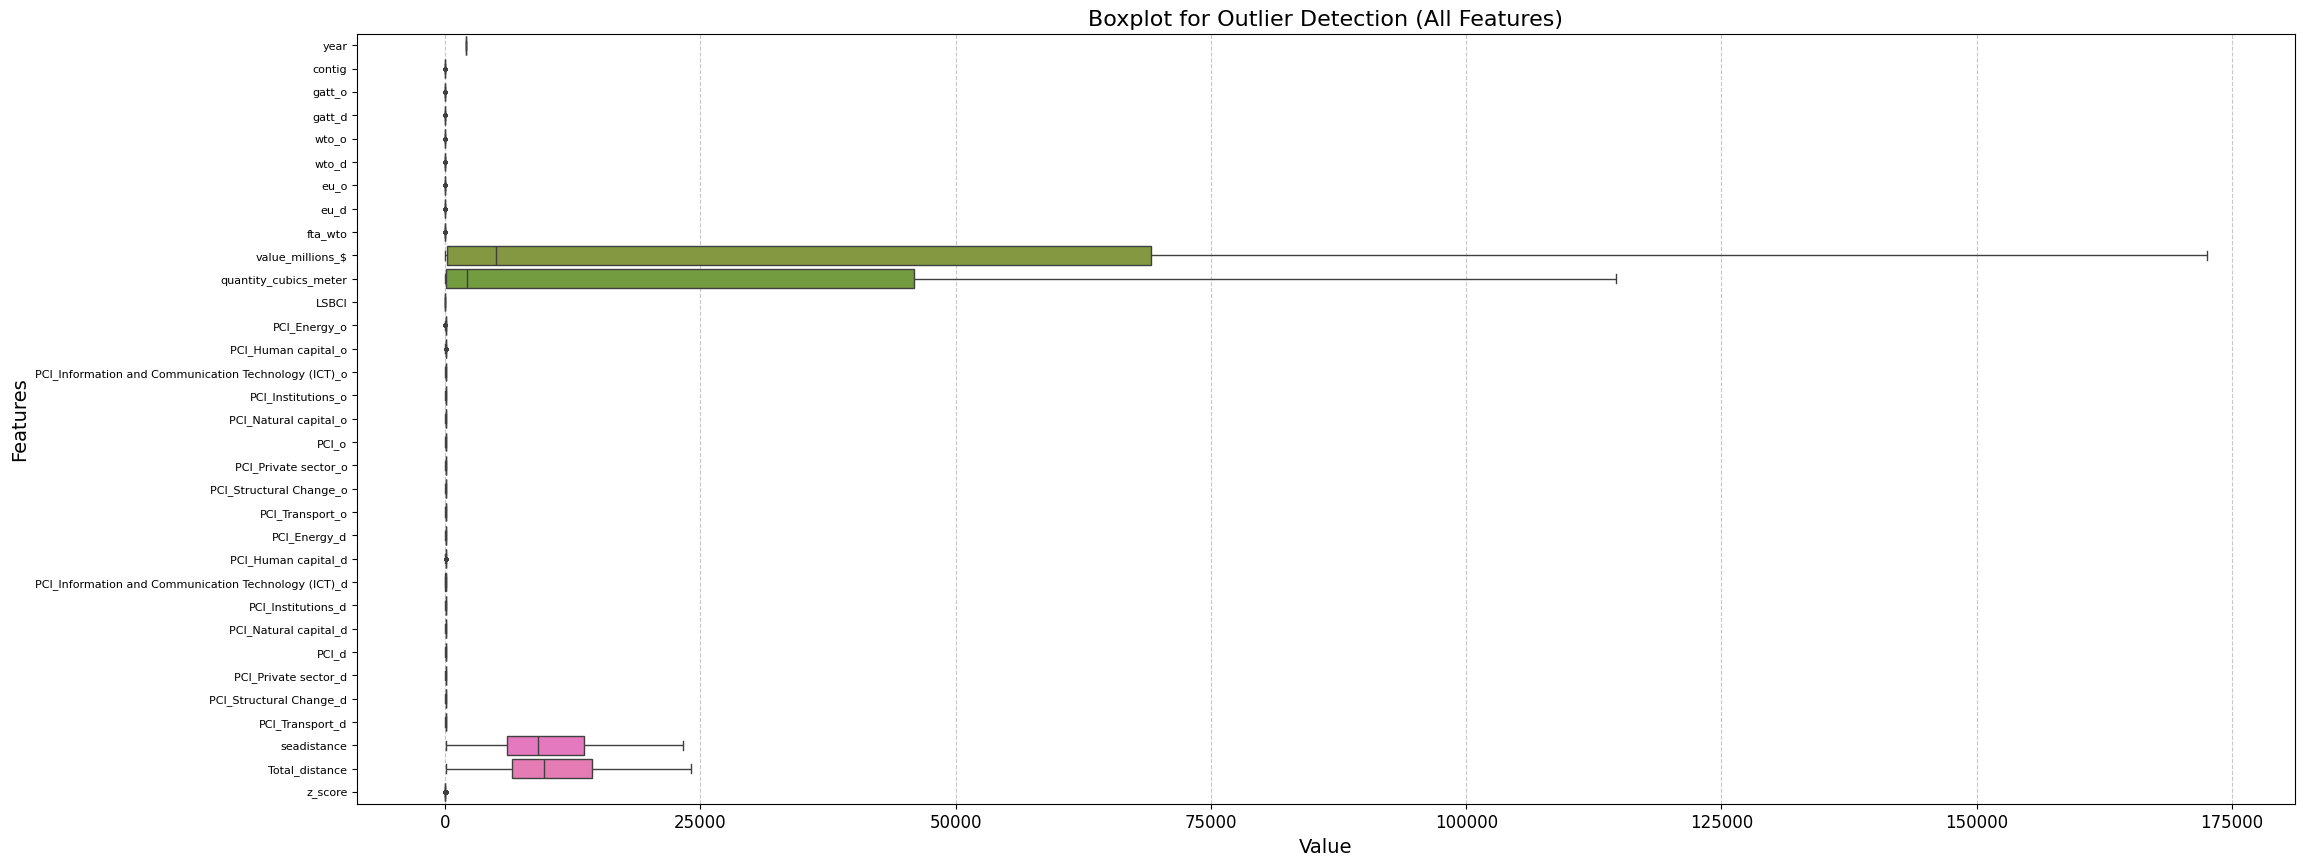

In [ ]:


plt.figure(figsize=(25, 10))  # Increase figure size for better visibility

# Create a boxplot for all numeric columns
sns.boxplot(data=df, orient="h", fliersize=2)  # Horizontal orientation, smaller outlier markers

plt.title("Boxplot for Outlier Detection (All Features)", fontsize=16)
plt.xlabel("Value", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=8)  # Reduce y-tick size for readability with 125 features
plt.grid(axis="x", linestyle="--", alpha=0.7)  # Add grid only on x-axis for better clarity

plt.show()

In [ ]:
df_encoded.describe()

origin   destination          year        contig        gatt_o  \
count  88272.000000  88272.000000  88272.000000  88272.000000  88272.000000   
mean      47.181428     46.947775      5.572718      0.017038      0.753206   
std       27.196168     27.378822      3.446093      0.129415      0.431148   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       23.000000     23.000000      3.000000      0.000000      1.000000   
50%       48.000000     48.000000      6.000000      0.000000      1.000000   
75%       71.000000     71.000000      9.000000      0.000000      1.000000   
max       94.000000     94.000000     11.000000      1.000000      1.000000   

             gatt_d         wto_o         wto_d          eu_o          eu_d  \
count  88272.000000  88272.000000  88272.000000  88272.000000  88272.000000   
mean       0.754667      0.915341      0.905723      0.215538      0.204527   
std        0.430287      0.278375      0.292215      0.411198      0.403358   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            fta_wto  value_millions_$  quantity_cubics_meter         LSBCI  \
count  88272.000000      88272.000000           88272.000000  88272.000000   
mean       0.204459      30784.780032           23418.395471   2972.176285   
std        0.403308      19352.821627           19344.309137   1643.046517   
min        0.000000          0.000000               0.000000      0.000000   
25%        0.000000      18901.000000            5742.000000   1951.000000   
50%        0.000000      25725.500000           19075.500000   2436.000000   
75%        0.000000      47228.250000           40274.250000   3982.250000   
max        1.000000      68846.000000           61720.000000   6736.000000   

       PCI_Energy_o  PCI_Human capital_o  \
count  88272.000000         88272.000000   
mean     582.714315           608.113399   
std      320.882238           327.870478   
min        0.000000             0.000000   
25%      314.000000           330.000000   
50%      591.000000           624.000000   
75%      860.000000           897.000000   
max     1137.000000          1138.000000   

       PCI_Information and Communication Technology (ICT)_o  \
count                                       88272.000000      
mean                                          594.650127      
std                                           324.200700      
min                                             0.000000      
25%                                           321.000000      
50%                                           608.000000      
75%                                           878.000000      
max                                          1139.000000      

       PCI_Institutions_o  PCI_Natural capital_o         PCI_o  \
count        88272.000000           88272.000000  88272.000000   
mean           592.558433             556.615348    601.363683   
std            327.889750             323.861724    327.927138   
min              0.000000               0.000000      0.000000   
25%            312.000000             277.000000    316.000000   
50%            593.000000             545.000000    618.000000   
75%            882.000000             834.000000    890.000000   
max           1137.000000            1138.000000   1135.000000   

       PCI_Private sector_o  PCI_Structural Change_o  PCI_Transport_o  \
count          88272.000000             88272.000000     88272.000000   
mean             596.343676               611.206113       560.372417   
std              327.863373               325.185735       316.310322   
min                0.000000       

In [ ]:
df_encoded.shape


(88272, 35)

In [ ]:
df_encoded

origin  destination  year  contig  gatt_o  gatt_d  wto_o  wto_d  eu_o  \
0           3            2     0       0       0       1      0      1     0   
1           3            2     1       0       0       1      0      1     0   
2           3            2     2       0       0       1      0      1     0   
3           3            2     3       0       0       1      0      1     0   
4           3            2     4       0       0       1      0      1     0   
...       ...          ...   ...     ...     ...     ...    ...    ...   ...   
88267       8           14    11       0       1       0      1      1     0   
88268       9           62    11       0       1       1      1      1     0   
88269      36           62    11       0       0       1      1      1     0   
88270      86           94    11       0       1       0      1      1     0   
88271      63           80    11       0       1       0      1      1     1   

       eu_d  fta_wto  value_millions_$  quantity_cubics_meter  LSBCI  \
0         0        0             64965                  18211   2542   
1         0        0             43762                  50144   2049   
2         0        0             26838                  25164   2009   
3         0        0              7631                   7068   2295   
4         0        0             33658                     12   2346   
...     ...      ...               ...                    ...    ...   
88267     0        0                14                      1    237   
88268     0        0               343                    236    297   
88269     0        0             33835                     76    214   
88270     0        0             48361                   1115    217   
88271     0        0               382                      3   1917   

       PCI_Energy_o  PCI_Human capital_o  \
0              1066                  671   
1              1069                  670   
2              1062                  675   
3              1055                  688   
4               917                  690   
...             ...                  ...   
88267           911                  831   
88268           458                  525   
88269           531                  702   
88270           527                  465   
88271          1065                  927   

       PCI_Information and Communication Technology (ICT)_o  \
0                                                    669      
1                                                    691      
2                                                    753      
3                                                    774      
4                                                    779      
...                                                  ...      
88267                                                979      
88268                                                563      
88269                                                868      
88270                                                681      
88271                                               1095      

       PCI_Institutions_o  PCI_Natural capital_o  PCI_o  PCI_Private sector_o  \
0                     954                     30    809                   883   
1                     952                     29    793                   807   
2                     957                     31    804                   774   
3                    1023                     20    813                   897   
4                    1014                     24    806                   814   
...                   ...                    ...    ...                   ...   
88267                 896                      5    788                   795   
88268                 431                    359    568                   618   
88269                 753                    383    624                   505   
88270                 527                    640    598                   383   
8827

In [ ]:
X = df_encoded.drop(columns=["value_millions_$"])  # Features
y = df_encoded["value_millions_$"]  # Target

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Neural Network": MLPRegressor(),
    "KNN": KNeighborsRegressor()
}

In [ ]:
# Define hyperparameter grids
param_grids = {
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "XGBoost": {"learning_rate": [0.01, 0.1, 0.2], "n_estimators": [100, 200]},
    "Neural Network": {"hidden_layer_sizes": [(50,), (100,)], "alpha": [0.0001, 0.001]},
    "KNN": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
}

In [ ]:
# Hyperparameter tuning
best_models = {}
for model_name, model in models.items():
    if model_name == "Linear Regression":
        model.fit(X_train, y_train)
    elif model_name == "Random Forest":
        random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=10, cv=5, scoring='r2', random_state=42)
        random_search.fit(X_train, y_train)
        model = random_search.best_estimator_
    elif model_name != "XGBoost":
        grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    best_models[model_name] = model

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perc

In [ ]:
# Bayesian Optimization using Optuna for XGBoost

def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 15)
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)
best_xgb_params = study.best_params
best_models["XGBoost"] = XGBRegressor(**best_xgb_params)
best_models["XGBoost"].fit(X_train, y_train)

[I 2025-04-04 17:03:03,827] A new study created in memory with name: no-name-6b04f983-318a-473c-9da8-62e82e069385
[I 2025-04-04 17:03:07,844] Trial 0 finished with value: 14988081.0 and parameters: {'learning_rate': 0.17101241433554046, 'n_estimators': 180, 'max_depth': 5}. Best is trial 0 with value: 14988081.0.
[I 2025-04-04 17:03:11,762] Trial 1 finished with value: 14503051.0 and parameters: {'learning_rate': 0.15269161533583384, 'n_estimators': 259, 'max_depth': 4}. Best is trial 1 with value: 14503051.0.
[I 2025-04-04 17:03:46,249] Trial 2 finished with value: 18881970.0 and parameters: {'learning_rate': 0.15876835874198644, 'n_estimators': 87, 'max_depth': 15}. Best is trial 1 with value: 14503051.0.
[I 2025-04-04 17:03:47,439] Trial 3 finished with value: 13961200.0 and parameters: {'learning_rate': 0.13840957749478217, 'n_estimators': 105, 'max_depth': 4}. Best is trial 3 with value: 13961200.0.
[I 2025-04-04 17:03:49,260] Trial 4 finished with value: 14246071.0 and parameters

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13840957749478217,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=105, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Model evaluation
performance = []
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    performance.append([
        model_name,
        mean_absolute_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred),
        r2_score(y_test, y_pred)
    ])

In [ ]:
# Create performance table
df_performance = pd.DataFrame(performance, columns=["Model", "MAE", "MSE", "R2 Score"])
print("\nPerformance Metrics:")
print(df_performance)


Performance Metrics:
               Model           MAE           MSE  R2 Score
0  Linear Regression  15667.577983  3.536104e+08  0.062200
1      Random Forest     11.827845  2.034574e+05  0.999460
2            XGBoost    911.541382  1.396120e+07  0.962974
3     Neural Network  13090.381017  2.818721e+08  0.252455
4                KNN   3364.029961  6.621234e+07  0.824400


<ipython-input-53-e0b874018629>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_performance["Model"], y=df_performance["R2 Score"], palette="viridis", ax=axes[0])
<ipython-input-53-e0b874018629>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_performance["Model"], y=df_performance["MAE"], palette="Blues_d", ax=axes[1])
<ipython-input-53-e0b874018629>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_performance["Model"], y=df_performance["MSE"], palette="Reds_d", ax=axes[2])


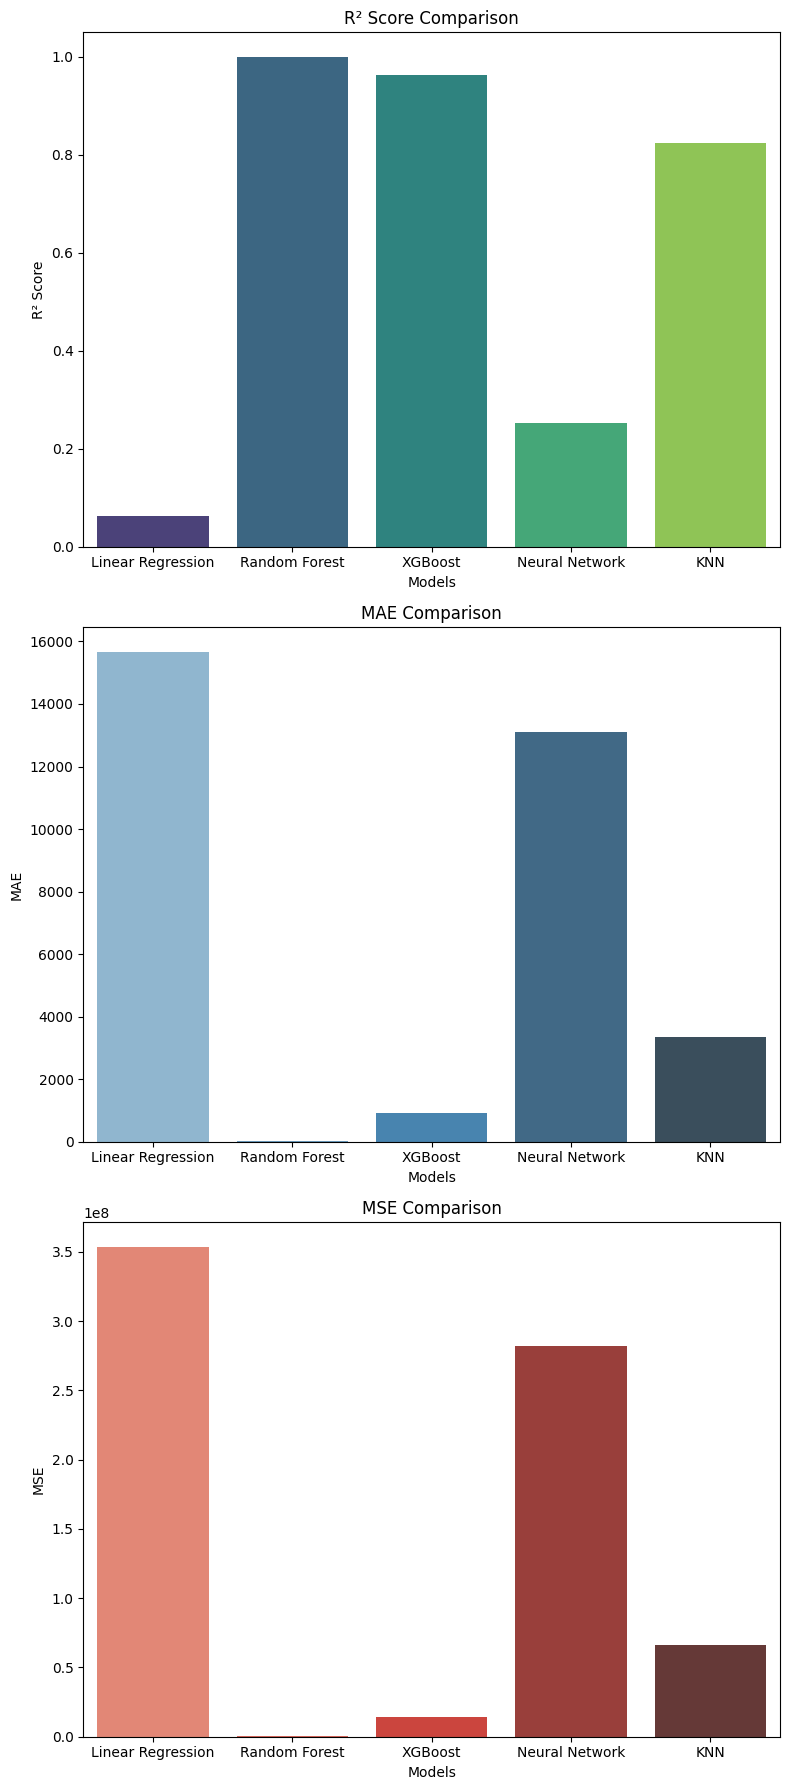

In [ ]:
# Visualization of results (stacked vertically)
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

sns.barplot(x=df_performance["Model"], y=df_performance["R2 Score"], palette="viridis", ax=axes[0])
axes[0].set_xlabel("Models")
axes[0].set_ylabel("R² Score")
axes[0].set_title("R² Score Comparison")

sns.barplot(x=df_performance["Model"], y=df_performance["MAE"], palette="Blues_d", ax=axes[1])
axes[1].set_xlabel("Models")
axes[1].set_ylabel("MAE")
axes[1].set_title("MAE Comparison")

sns.barplot(x=df_performance["Model"], y=df_performance["MSE"], palette="Reds_d", ax=axes[2])
axes[2].set_xlabel("Models")
axes[2].set_ylabel("MSE")
axes[2].set_title("MSE Comparison")

plt.tight_layout()
plt.show()

**Explanation of each algorithm and limitations**

Linear Regression: Assumes a linear relationship between features and target, may underperform on complex data.

Random Forest: Ensemble method that reduces overfitting but can be computationally expensive.

XGBoost: Powerful boosting algorithm that improves performance but requires careful hyperparameter tuning.

Neural Network: Captures complex patterns but requires large data and tuning to avoid overfitting.

KNN: Simple and interpretable but can struggle with high-dimensional data and large datasets.

#Feature Details

Unnamed: 0 – Likely an index column
origin – The starting location (country, region, or entity).

destination – The target location (country, region, or entity).

year – The year of the observation.

iso_o – ISO code of origin country.

iso_d – ISO code of destination country.

contig – Contiguity indicator (1 if origin & destination share a border, 0 otherwise).

gatt_o – Origin country’s membership in GATT (General Agreement on Tariffs and Trade).

gatt_d – Destination country’s membership in GATT.

wto_o – Origin country’s membership in WTO (World Trade Organization).

wto_d – Destination country’s membership in WTO.

eu_o – Whether the origin country is in the EU (European Union).

eu_d – Whether the destination country is in the EU.

fta_wto – Free Trade Agreement (WTO-related indicator).

value_millions_$ – Trade value in millions of dollars.

quantity_cubics_meter – Quantity of goods traded (in cubic meters).

BS1_TV_186TP_o – Business Services Index for origin (TV-186TP category).

BS1_TV_30TP_o – Business Services Index for origin (TV-30TP category).

BS1_TV_186TP_d – Business Services Index for destination (TV-186TP category).

BS1_TV_30TP_d – Business Services Index for destination (TV-30TP category).

LSBCI – Logistics and Supply Chain Benchmark Index.

Productive Capacity Index (PCI) – Origin & Destination

PCI_Energy_o – Energy infrastructure for origin.

PCI_Human capital_o – Human capital index for origin.

PCI_Information and Communication Technology (ICT)_o – ICT infrastructure in origin.

PCI_Institutions_o – Institutional framework for origin.

PCI_Natural capital_o – Natural resources availability in origin.

PCI_o – Overall PCI score for origin.

PCI_Private sector_o – Private sector development in origin.

PCI_Structural Change_o – Structural change indicator for origin.

PCI_Transport_o – Transport infrastructure for origin.

PCI_Energy_d – Energy infrastructure for destination.

PCI_Human capital_d – Human capital index for destination.

PCI_Information and Communication Technology (ICT)_d – ICT infrastructure in destination.

PCI_Institutions_d – Institutional framework for destination.

PCI_Natural capital_d – Natural resources availability in destination.

PCI_d – Overall PCI score for destination.

PCI_Private sector_d – Private sector development in destination.

PCI_Structural Change_d – Structural change indicator for destination.

PCI_Transport_d – Transport infrastructure for destination.

seadistance – Distance traveled via sea routes.

Total_distance – Total distance between origin and destination.

short – Possibly a binary or categorical indicator